Please fill out:
* Student name: Tamjid Ahsan
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:

# INTRODUCTION

## Overview

King County is located in the U.S. state of Washington. The population was 2,252,782 in the 2019 census estimate, making it the most populous county in Washington, and the 12th-most populous in the United States. The county seat is Seattle, also the state's most populous city. The county is named to honor civil rights leader Martin Luther King Jr.[[1]](https://en.wikipedia.org/wiki/King_County,_Washington) 

The county sees a USD 700K Median Listing Home Price, USD 431 Median Listing Home Price/Sq Ft, USD 766K Median Sold Home Price, with around 6000 homes listed for sale and 2800 homes for rent.[[2]](https://www.realtor.com/realestateandhomes-search/King-County_WA/overview) Homes in King County, WA sold for 2.19% above asking price on average in March 2021 with a median of 36 days days on market.


In March 2021, King County home prices were up 15.4% compared to last year. There were 3,198 homes sold in March 2021, up from 2,656 last year.[[3]](https://www.redfin.com/county/118/WA/King-County/housing-market).

This makes the county a prime market of real estate, and a paramount candidate for analysis. The namesake of Martin King Luther Jr. has a very lucrative real estate market worth exploring.

## Business problem

<img src="./assets/image_1.gif"
     alt="Map!"
     style="float: center; margin-center: 2px;">
     
Source: image generated by author using tableau public, and online gif maker.

King County Residents that want to renovate their home to increase its resale value, but don't know what factors are important for determining a home's value. While focusing on features they can renovate, I shall discuss key factors of a home's price. This factors can be both under their constrain and beyond their control.

Those include:
- How to improve marketability.
- Focus on which aspect of the house.
- What factors to keep in mind deciding budget and required return on investment.

# OBTAIN

Data for this analysis was provided as part of phase two project of [The Flatiron School](https://flatironschool.com/) Full Time Online Data Science program. This a fork of [that](https://github.com/learn-co-curriculum/dsc-phase-2-project). The csv file named `kc_house_data.csv` contains following information in this repository located at `./data/kc_house_data.csv`.

GeoJson file used to get map is soured from [here](https://github.com/OpenDataDE/State-zip-code-GeoJSON/blob/master/wa_washington_zip_codes_geo.min.json) provided by [Open Data Delaware](https://github.com/OpenDataDE/). A copy of that can be found at `./data/wa_washington_zip_codes_geo.min.json'` in this repository.

## Column Names and descriptions for Kings County Data Set

As the readme file accompanying the dataset.

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


Although explanation and data contained in **view** does not make any real life sense. It is very unlikely that so many house is sold without inspection, with keeping in mind that some folks buy houses for investment purpose, still some kind of representative visits and facilitate buying process. All other features are supportive of the explanation given and data contained with some extreme outliers, e.g. one house has 33 bedroom with an disproportionate sqft.

# SCRUB & EXPLORE

In [25]:
# loading data
df = pd.read_csv('./data/kc_house_data.csv')

In [26]:
# observe subset of data
df.sample(10)

id        date      price  ...     long  sqft_living15  sqft_lot15
3282   4364700805  10/15/2014   315000.0  ... -122.373           1360        7560
9516   1310960220   6/26/2014   280927.0  ... -122.274           2080        7210
9289   1422029138    9/2/2014   565000.0  ... -122.515           1870      109468
6678   7852020660    5/9/2014   505000.0  ... -121.867           1890        4140
2473   6414600260  10/30/2014   345000.0  ... -122.331           1200        7857
20309   518500480   8/11/2014  3000000.0  ... -122.205           3550        5634
4894   5438000280   4/15/2015   325000.0  ... -122.195           1560       10572
20347  9211000170   10/8/2014   570000.0  ... -122.150           2950        6537
19240  1854750090   7/16/2014  1230000.0  ... -122.128           3710       10030
10488  7202350310  10/28/2014   476000.0  ... -122.030           1690        3200

[10 rows x 21 columns]

In [27]:
# columns inside DataFrame
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [28]:
df.shape

(21597, 21)

In [29]:
# checking for data type
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [30]:
check_NaN(df)

name  is_null  not_null
0              id        0     21597
1            date        0     21597
2           price        0     21597
3        bedrooms        0     21597
4       bathrooms        0     21597
5     sqft_living        0     21597
6        sqft_lot        0     21597
7          floors        0     21597
8      waterfront     2376     19221
9            view       63     21534
10      condition        0     21597
11          grade        0     21597
12     sqft_above        0     21597
13  sqft_basement        0     21597
14       yr_built        0     21597
15   yr_renovated     3842     17755
16        zipcode        0     21597
17            lat        0     21597
18           long        0     21597
19  sqft_living15        0     21597
20     sqft_lot15        0     21597

In [31]:
check_duplicates(df)

name  duplicated  not_duplicated
0              id         177           21420
1            date       21225             372
2           price       17975            3622
3        bedrooms       21585              12
4       bathrooms       21568              29
5     sqft_living       20563            1034
6        sqft_lot       11821            9776
7          floors       21591               6
8      waterfront       21594               3
9            view       21591               6
10      condition       21592               5
11          grade       21586              11
12     sqft_above       20655             942
13  sqft_basement       21293             304
14       yr_built       21481             116
15   yr_renovated       21526              71
16        zipcode       21527              70
17            lat       16564            5033
18           long       20846             751
19  sqft_living15       20820             777
20     sqft_lot15       12915            8682


____________________________________________________________
DataFrame Columns Boxplot
____________________________________________________________


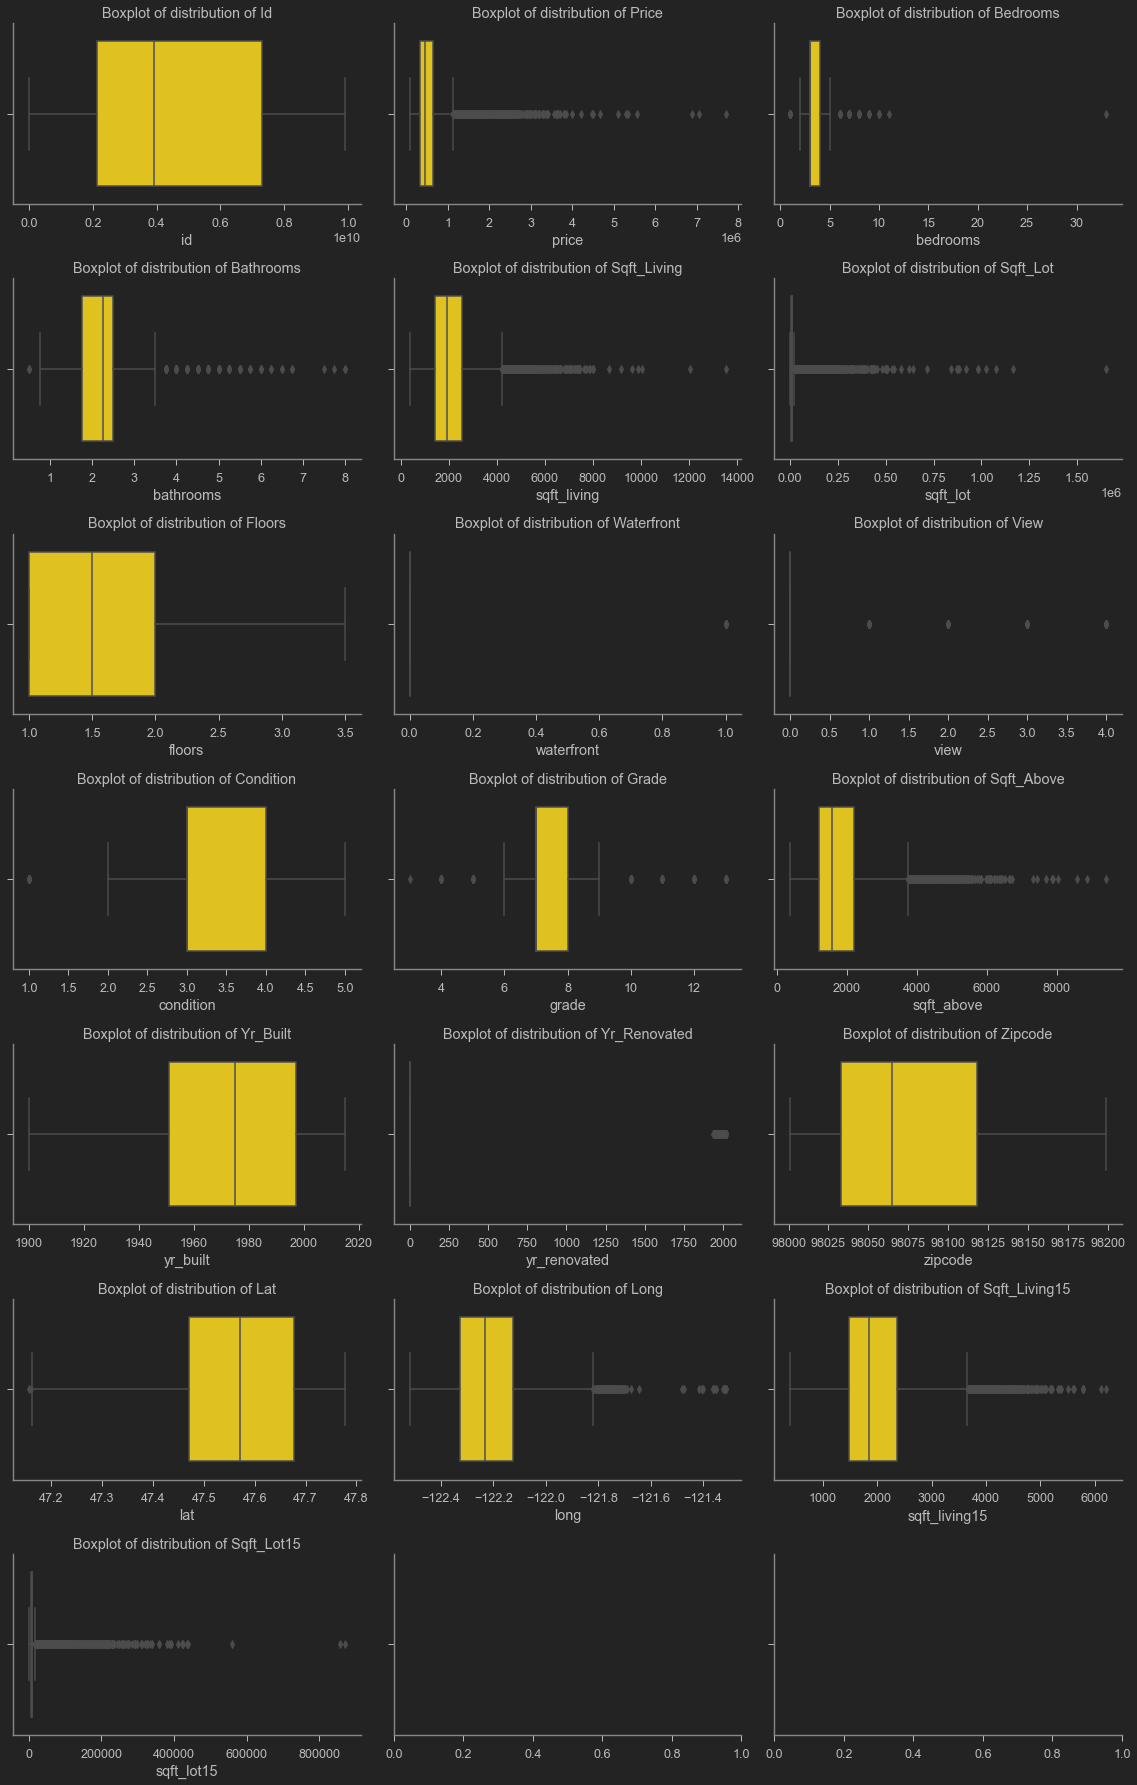

In [32]:
# 'date' and 'sqft_basement' both has incorrect dtype
check_outliers_in_df(df.drop(['date','sqft_basement'],axis=1),show_dfs=False)

In [33]:
# looking at numerical features
df.describe().transpose().style.format("{0:,.0f}")

## Initial cleaning

In [34]:
# cleaning data

# drop duplicates based on id column
df = df[~df.duplicated(['id'], keep='first')]
# reseting index
df = df.reset_index().drop('index', axis=1, errors='ignore')

# converting date to datetime
df.loc[:, 'date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

# nan and error handeling
# waterfront
df.loc[:, 'waterfront'] = df['waterfront'].replace({np.nan: 0})
df.loc[:, 'waterfront'] = df['waterfront'].astype('int')
# view
df.loc[:, 'view'] = df['view'].replace({np.nan: 0})
# yr_renovated
df.loc[:, 'yr_renovated'] = df['yr_renovated'].replace({np.nan: 0})
df.loc[:, 'yr_renovated'] = df['yr_renovated'].astype('int')
# sqft_basement
df.loc[:, 'sqft_basement'] = df['sqft_basement'].replace({'?': 0})
df.loc[:, 'sqft_basement'] = pd.to_numeric(df['sqft_basement'],
                                           errors="coerce")
df.loc[:, 'sqft_basement'] = df['sqft_basement'].astype('int')

In [35]:
# droping possible error in input
df = df[df['bedrooms']!=33]
# reseting index
df = df.reset_index().drop('index', axis=1, errors='ignore')

In [36]:
# after cleaning
display(check_NaN(df), check_duplicates(df),
        df.describe().transpose().style.format("{0:,.0f}"))

name  is_null  not_null
0              id        0     21419
1            date        0     21419
2           price        0     21419
3        bedrooms        0     21419
4       bathrooms        0     21419
5     sqft_living        0     21419
6        sqft_lot        0     21419
7          floors        0     21419
8      waterfront        0     21419
9            view        0     21419
10      condition        0     21419
11          grade        0     21419
12     sqft_above        0     21419
13  sqft_basement        0     21419
14       yr_built        0     21419
15   yr_renovated        0     21419
16        zipcode        0     21419
17            lat        0     21419
18           long        0     21419
19  sqft_living15        0     21419
20     sqft_lot15        0     21419

name  duplicated  not_duplicated
0              id           0           21419
1            date       21047             372
2           price       17812            3607
3        bedrooms       21408              11
4       bathrooms       21390              29
5     sqft_living       20385            1034
6        sqft_lot       11643            9776
7          floors       21413               6
8      waterfront       21417               2
9            view       21414               5
10      condition       21414               5
11          grade       21408              11
12     sqft_above       20477             942
13  sqft_basement       21116             303
14       yr_built       21303             116
15   yr_renovated       21349              70
16        zipcode       21349              70
17            lat       16386            5033
18           long       20668             751
19  sqft_living15       20642             777
20     sqft_lot15       12737            8682

## Feature engineering

NOTE: by `"k"` i mean each house and `"n"` means total house.

### Distance from downtown Seattle

Seattle downtown coordinate for this is considered at 
* 47.6062° N, 
* 122.3321° W

In [1]:
df_distace = distance_(df, 'lat', 'long')
df = pd.concat([df, df_distace], axis=1, ignore_index=False)


NameError: name 'distance_' is not defined

### Price per sqft

Ratio of price of each house over total sqft of that.

In [38]:
df['price_per_sqft'] = round(df['price']/(df['sqft_lot']+df['sqft_living']),2)

In [39]:
df.loc[:, 'price_per_sqft'] = df['price_per_sqft'].astype('str')
df.loc[:, 'price_per_sqft'] = df['price_per_sqft'].astype('float')

### Neighborhood

boolean feature to check that Total sqft of n is with in 40% to 60% range of average of total sqft of surrounding 15 house to detect unusual house in the neighborhood. Check for unusual homes.

In [2]:
sum_sqft_n = (df['sqft_lot'] + df['sqft_living'])
sum_sqft_15 = (df['sqft_lot15'] + df['sqft_living15'])
df['total_sqft_larger_than_neighbours'] = ((sum_sqft_15 * .4 <= sum_sqft_n) &
                                           (sum_sqft_n <= sum_sqft_15 * .6))
df['total_sqft_larger_than_neighbours'] = df[
    'total_sqft_larger_than_neighbours'].apply(lambda x: 1 if x == True else 0)
print(df['total_sqft_larger_than_neighbours'].dtype)


NameError: name 'df' is not defined

### Is Renovated

In [42]:
print(
    f'Out of {len(df.yr_renovated)} values, {df.yr_renovated.value_counts()[0]} are empty while only {df.yr_renovated.value_counts()[1:].sum()} rows containing year renovated. This is not usefull for the model. So this feature is converted to a boolean, where 1 means it is renovated and 0 means it not renovated.'
)

Out of 21419 values, 20679 are empty while only 740 rows containing year renovated. This is not usefull for the model. So this feature is converted to a boolean, where 1 means it is renovated and 0 means it not renovated.


In [43]:
df['is_renovated'] = df['yr_renovated'].apply(lambda x: 0
                                              if x == 0 else 1)

## First look at the cleaned dataset

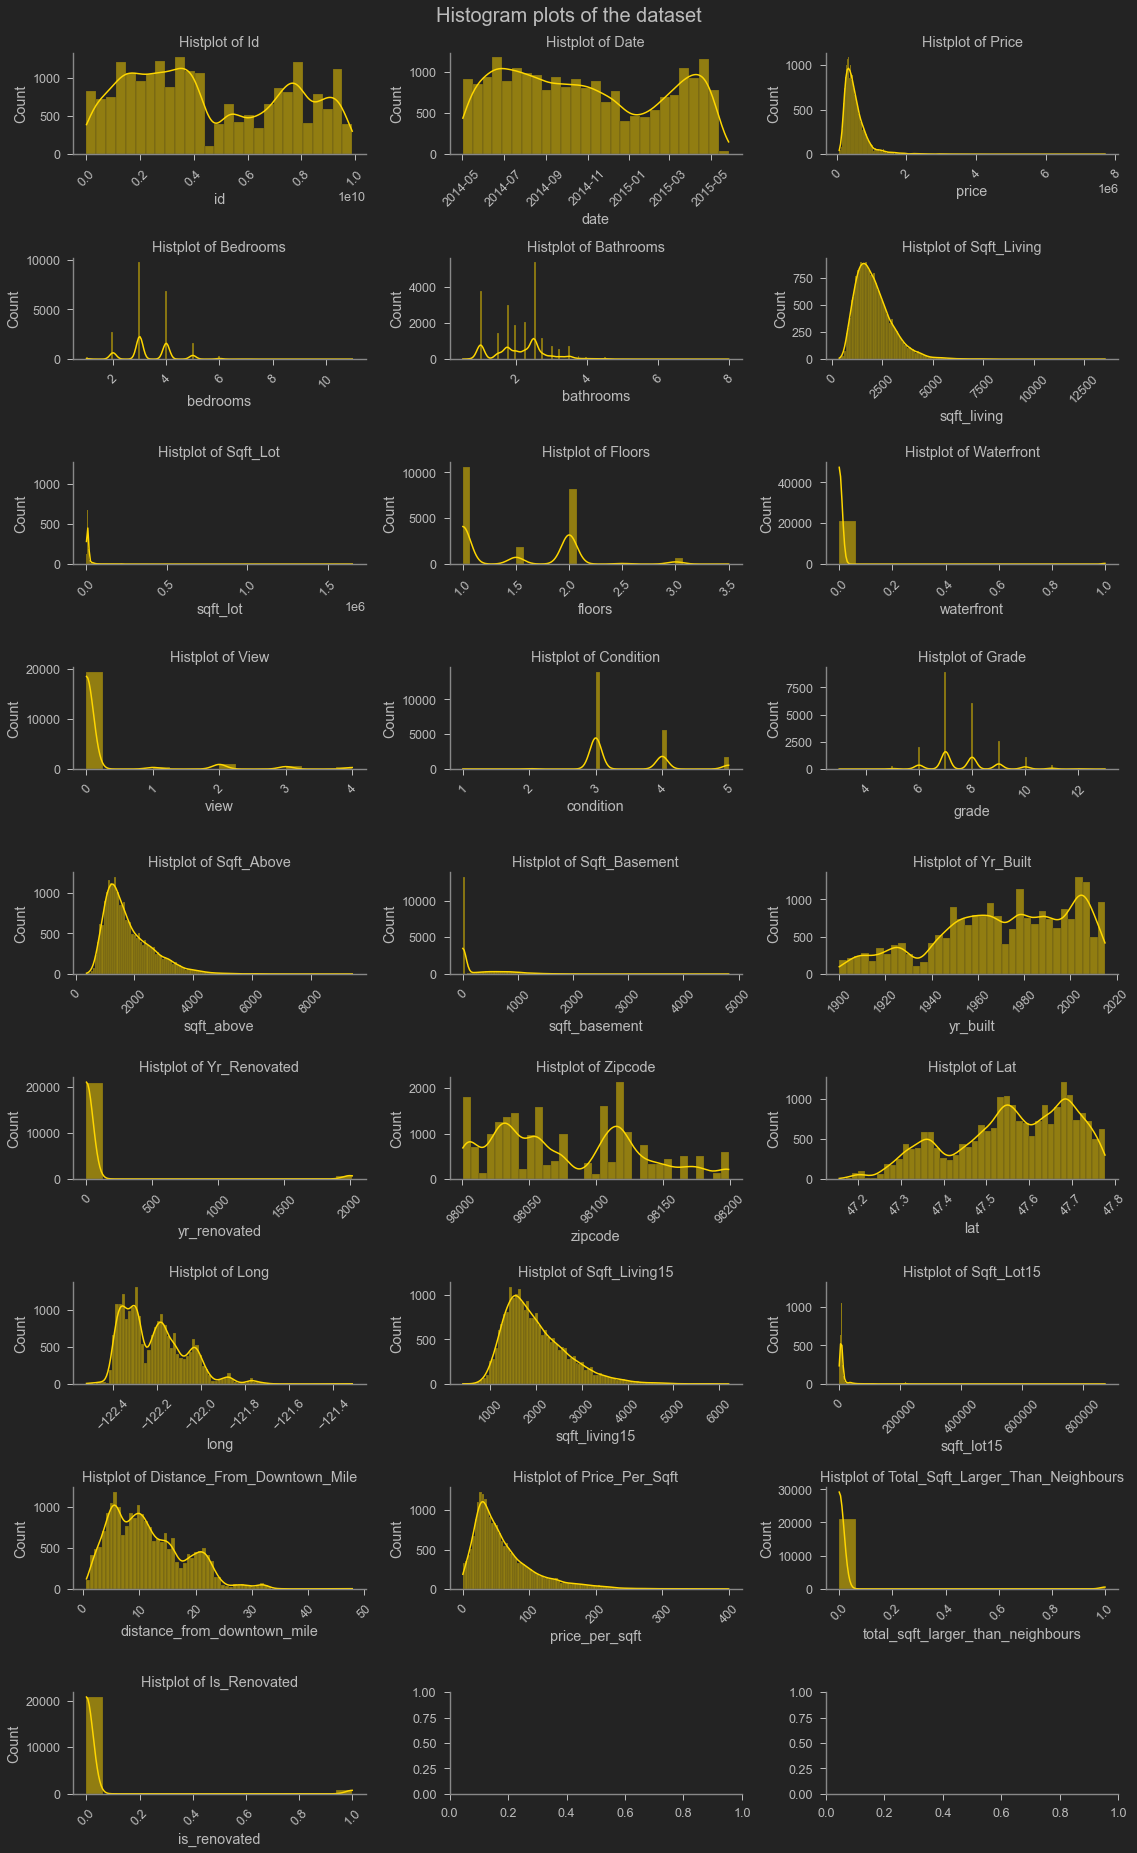

In [46]:
fig, axes = plt.subplots(nrows=num_col_for_plotting(len(df.columns), col=3),
                         ncols=3,
                         figsize=(16, 26),
                         sharey=False)
for ax, column in zip(axes.flatten(), df):
    sns.histplot(x=column, data=df, color='gold', ax=ax, kde=True)
    ax.set_title(f'Histplot of {column.title()}')
    ax.tick_params('x', labelrotation=45)
    sns.despine()
    plt.tight_layout()
    plt.suptitle('Histogram plots of the dataset',
                 fontsize=20,
                 fontweight=3,
                 va='bottom')


____________________________________________________________
DataFrame Columns Boxplot
____________________________________________________________


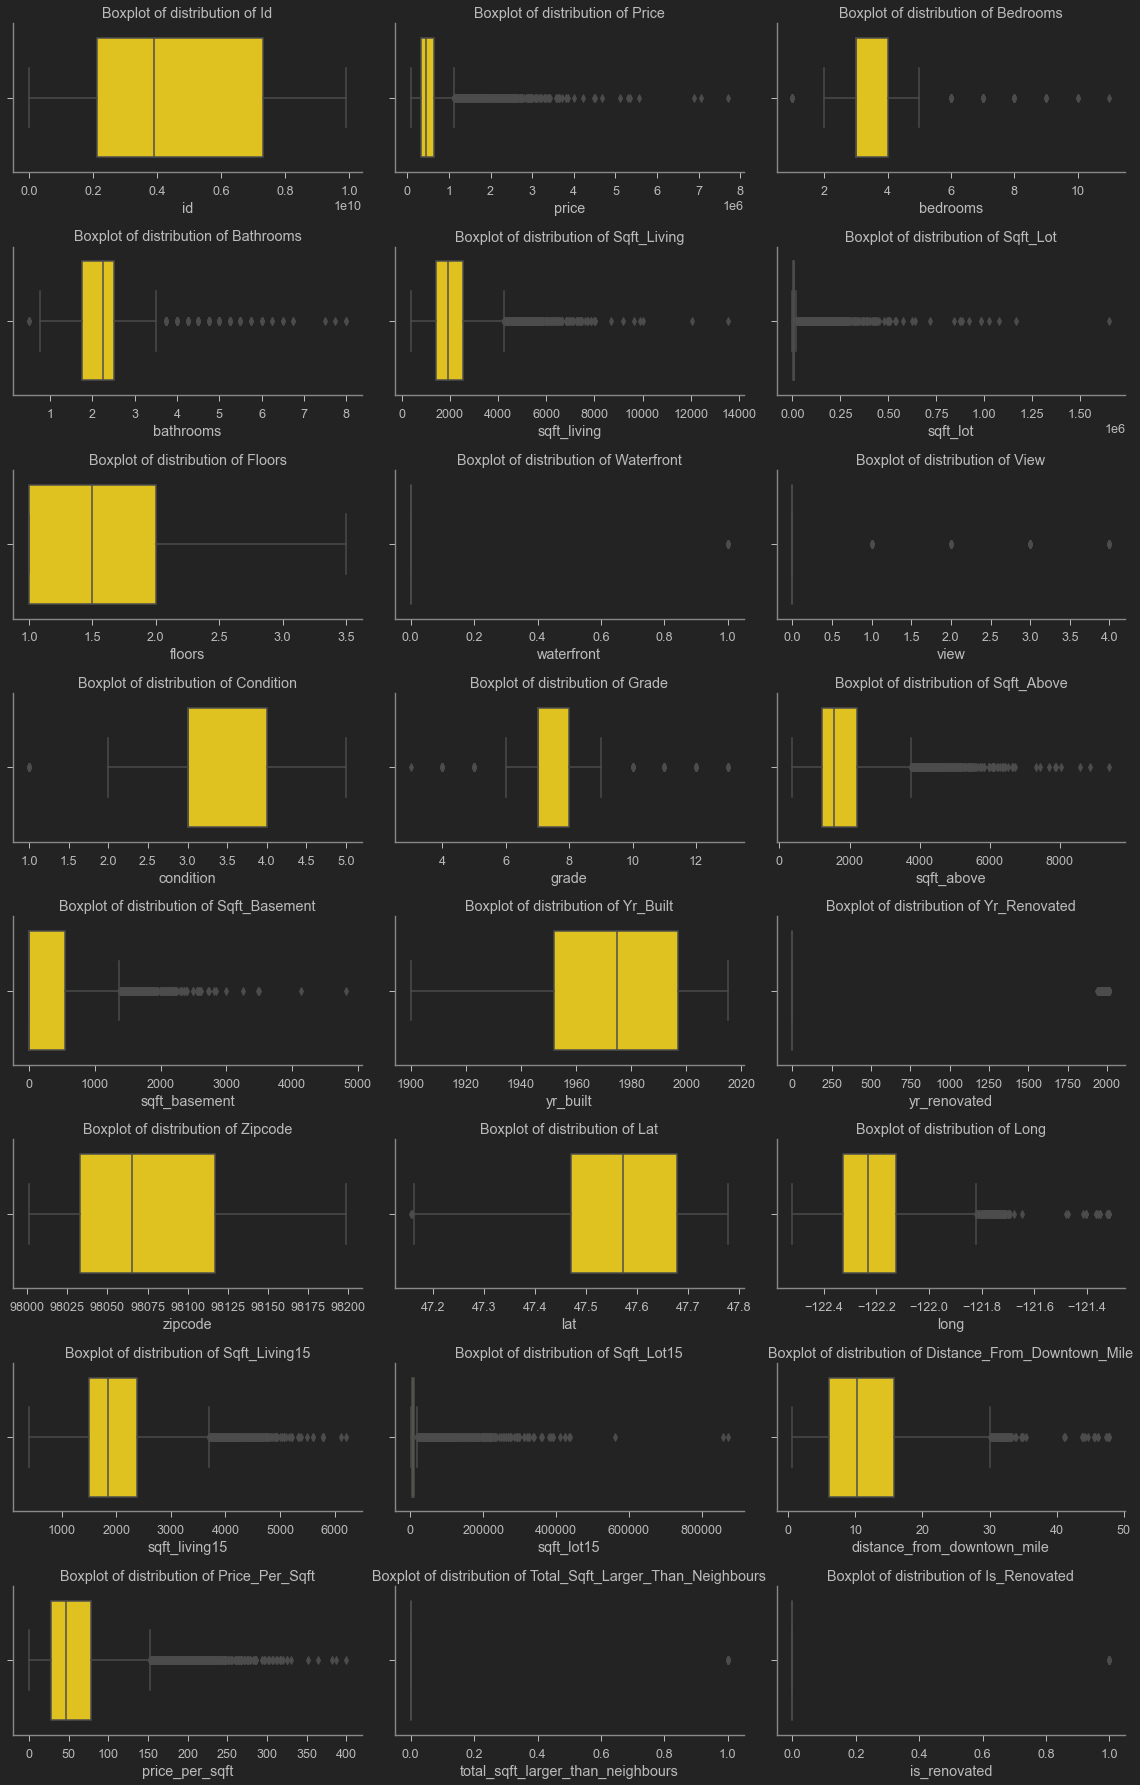

In [47]:
check_outliers_in_df(df.drop('date', axis=1),
                     chart_type='boxplot',
                     show_dfs=False)

## Categorical and Numerical  features

### Identifying

In [49]:
# based on information from the readme file attached to the dataset.
# House identifier
unique_feat_df = ['id']
# Catagorical features
categorical_feat_df = [
    'waterfront', 'view', 'condition', 'grade', 'is_renovated'
]
# Continuous features
numerical_continuous_feat_df = [
    'price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
    'sqft_living15', 'sqft_lot15', 'price_per_sqft',
    'distance_from_downtown_mile', 'total_sqft_larger_than_neighbours',
    'price_per_sqft'
]
numerical_discrete_feat_df = ['bedrooms', 'bathrooms', 'floors']
# Timing features
time_feat_df = ['date', 'yr_built', 'yr_renovated']
# Location feat
location_feat_df = ['lat', 'long', 'zipcode']

### Classification

In [51]:
# checkpoint and fail safe measure
df.to_csv(r'./Data/kc_house_data_df.csv', index=False)

### Dropping

In the Dataframe for initial model `id`, `date`, `yr_renovated`, and `view` is not included. My reasoning for this is following:
- `id`: This is the identifier column.
- `date`: Sale date is not important input for now as I am not capturing seasonality of value for this analysis.
- `yr_renovated`: Already converted to boolean column.
- `view`: Not sure about this feature what it really means as not much information is provided. This can also be a categorical or numeric feature.

### Initial data for the model

In [56]:
df_model

price  bedrooms  ...  total_sqft_larger_than_neighbours  is_renovated
0      221900.0         3  ...                                  0             0
1      538000.0         3  ...                                  0             1
2      180000.0         2  ...                                  0             0
3      604000.0         4  ...                                  0             0
4      510000.0         3  ...                                  0             0
...         ...       ...  ...                                ...           ...
21414  360000.0         3  ...                                  0             0
21415  400000.0         4  ...                                  0             0
21416  402101.0         2  ...                                  0             0
21417  400000.0         3  ...                                  0             0
21418  325000.0         2  ...                                  0             0

[21419 rows x 21 columns]

In [57]:
numerical_feat_model = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15',
    'sqft_lot15', 'distance_from_downtown_mile','price_per_sqft'
]
# although all contain numbers to discribe, numbers represent categories.
categorical_feat_model = [
    'waterfront', 'condition', 'grade', 'is_renovated', 'zipcode','total_sqft_larger_than_neighbours'
]
len(numerical_feat_model + categorical_feat_model) == len(df_model.columns)

True

## Feature relationships

### Feature correlation and multicollinearity 

### Heatmap

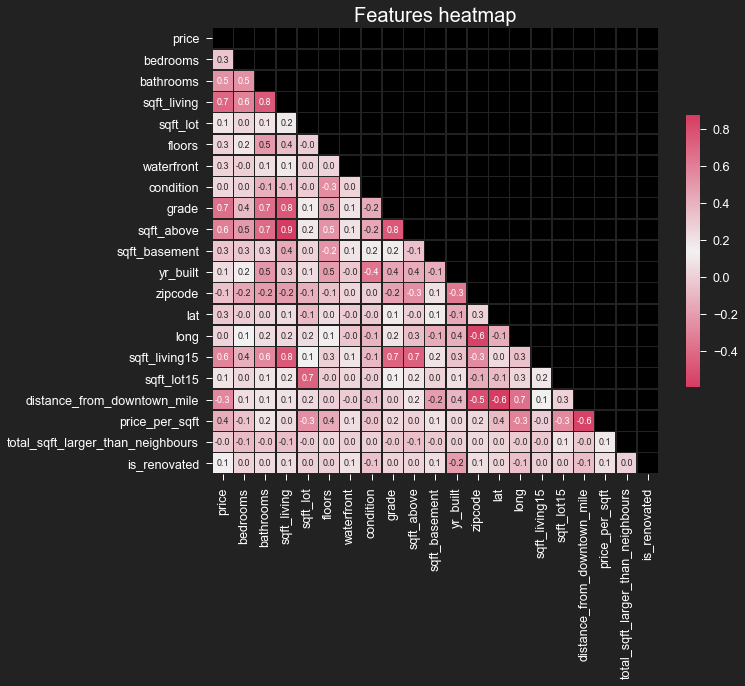

In [60]:
heatmap_DataFrame(df_model)

Only sqft features are collinear in nature. This is expected. and has a relationship with grade. Leaving it as it is right now.

#### View

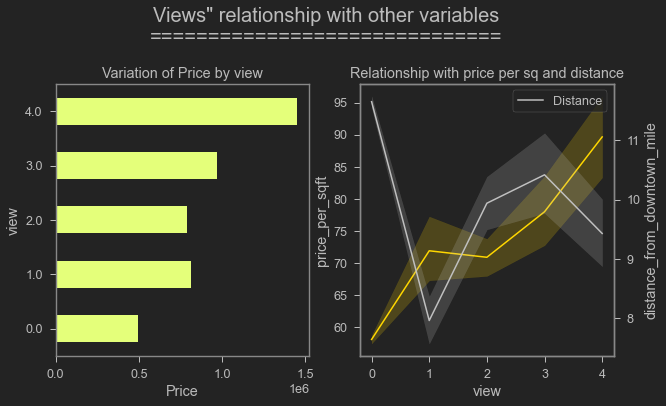

In [66]:
# without the axis lines.
fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax = round(df.groupby(by='view').mean('price_per_sqft')['price'],
           2).plot(kind='barh',
                   colormap='Wistia',
                   title='Variation of Price by view',
                   ax=ax)
ax.set_xlabel('Price')
ax = sns.lineplot(y='price_per_sqft', x='view', data=df, color='gold')
ax2 = ax.twinx()
ax2 = sns.lineplot(y='distance_from_downtown_mile',
                   x='view',
                   data=df,
                   color='silver')
ax2.set_title('Relationship with price per sq and distance')
ax2.set_label("Distance")
ax2.legend(['Distance'])
plt.suptitle(f'Views" relationship with other variables\n{"="*30}',
             fontsize=20,
             va='bottom')
plt.show()

Now trying to make sense of `"view"`. It seems like it detects the aesthetic quality of the house. Not sure if it is something a owner can manipulate, e.g. architectural design or landscaping and decoration; or its is natural, e.g. close to a park.

Higher rated house has the greatest average price. This trend is very clear.

It seems that houses closer to the downtown has a higher price per sqft but lower view as the city landscape is not pristine but proximity to business center makes them desirable. But at the next category price drops as distance increases, people are not shelling coins for sub-par property. When the distance is high means we are out of downtown with less congested area where view is better, thus increase in price. Then at the last one we are at the suburbs, where price sees a drop because of distance.

The boxed area is the highest rating lowest price.

This feature is still sufficiently ambiguous to present to the public, I might be interpreting this from a myopic view and got entirely wrong. 

### check the distribution of the features

NONE of them are normal. Some with large outliers. This issue will be tackled in later steps.

### Check the linearity of the features

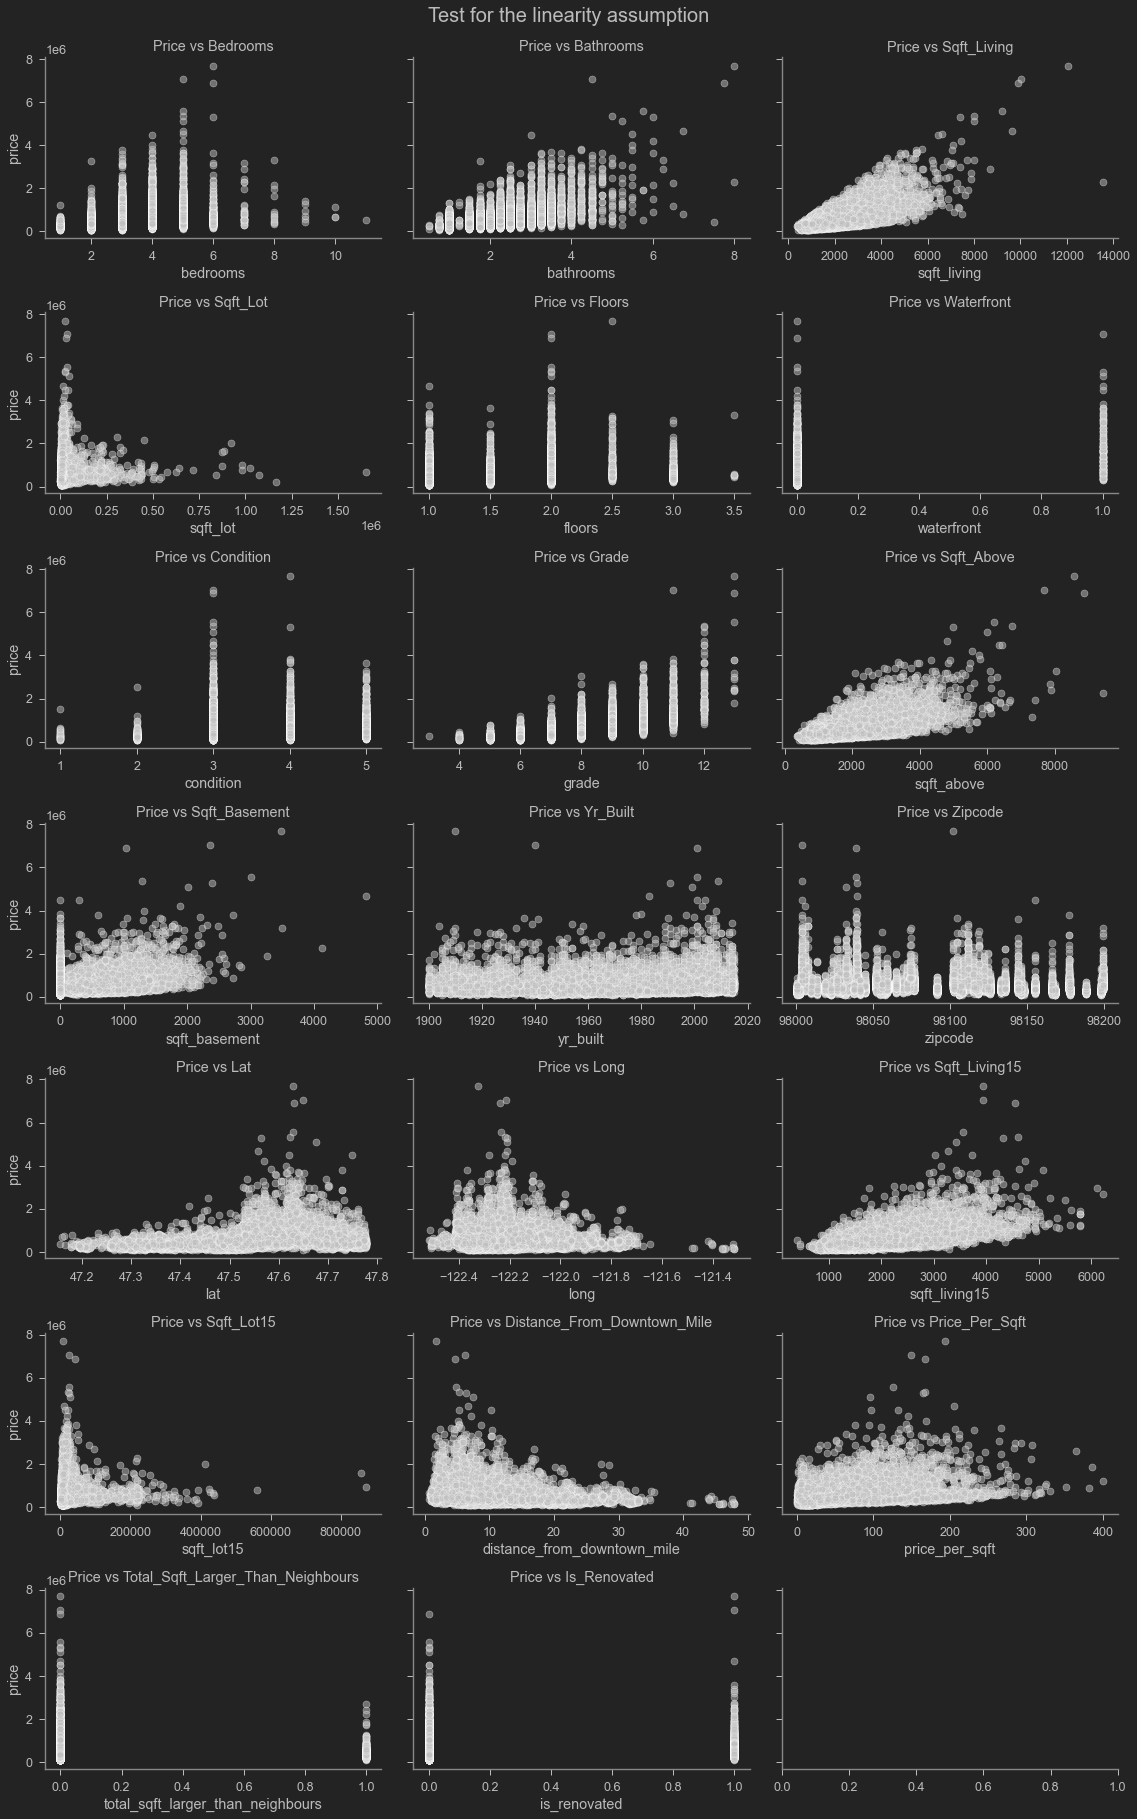

In [69]:
test_for_linearity(df_model)

Most of them have some what linear relationship with price, with some features having interesting insights. Those will be explored in later section.

### Check the normality assumptions

### Paired Feature exploration

#### Price VS Year Built

Hoses built in the 40's to 60's have good value. A weird situation for the beginning of 70's, maybe related to a quirk of the dataset or energy crisis of that time, more domain research is needed to comment on that. High sale frequency in the early 00's to a dip in 2008 because of the global financial crisis because of subprime mortgage situation. House prices was in a bubble that created the financial crisis. This data also supports that. This data of house price and sale coincides with all financial crisis. But across the board house price is stable. Have to look into sale date to make any further comment.

#### Price VS Bedroom Count

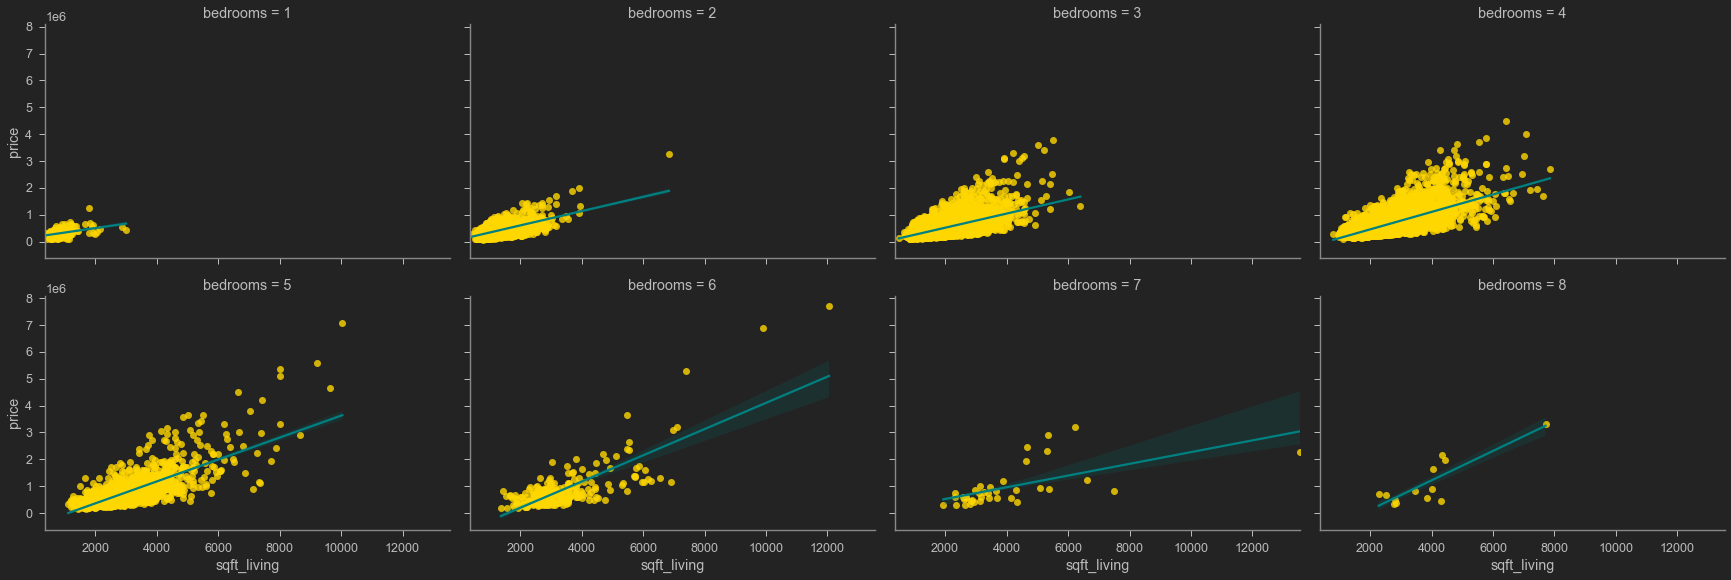

In [74]:
sns.lmplot(y='price',
           x='sqft_living',
           col='bedrooms',
           col_wrap=4,
           data=df_model[df_model.bedrooms <= 8],
           palette='Set2',
           ci=68,
           height=4,
           aspect=1.5,
           scatter_kws={'color': 'gold'},
           line_kws={'color': 'teal'})  #, color='teal', alpha=.4)

Increased bedroom count has a diminishing return after a certain thresh hold, which is 5 after that . Although more house with more bedroom has higher average sale price, this is because they are usually a larger property. I could bin house size and go down that path to pin point that, but not choosing not to for the sake of time constraint.

#### Price VS Distance from downtown

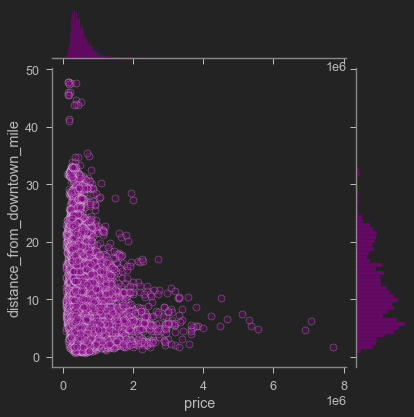

In [77]:
sns.jointplot(x='price',
              y='distance_from_downtown_mile',
              data=df_model,
              color='purple',
              alpha=.35)

This is a no-brainer. But it helped me to spot some outliers. Later confirmed by looking at the map. Making a cap of arbitrary 40 miles cap there guided by looking at the above plot. I found 18 outliers.

### Location

#### House Location

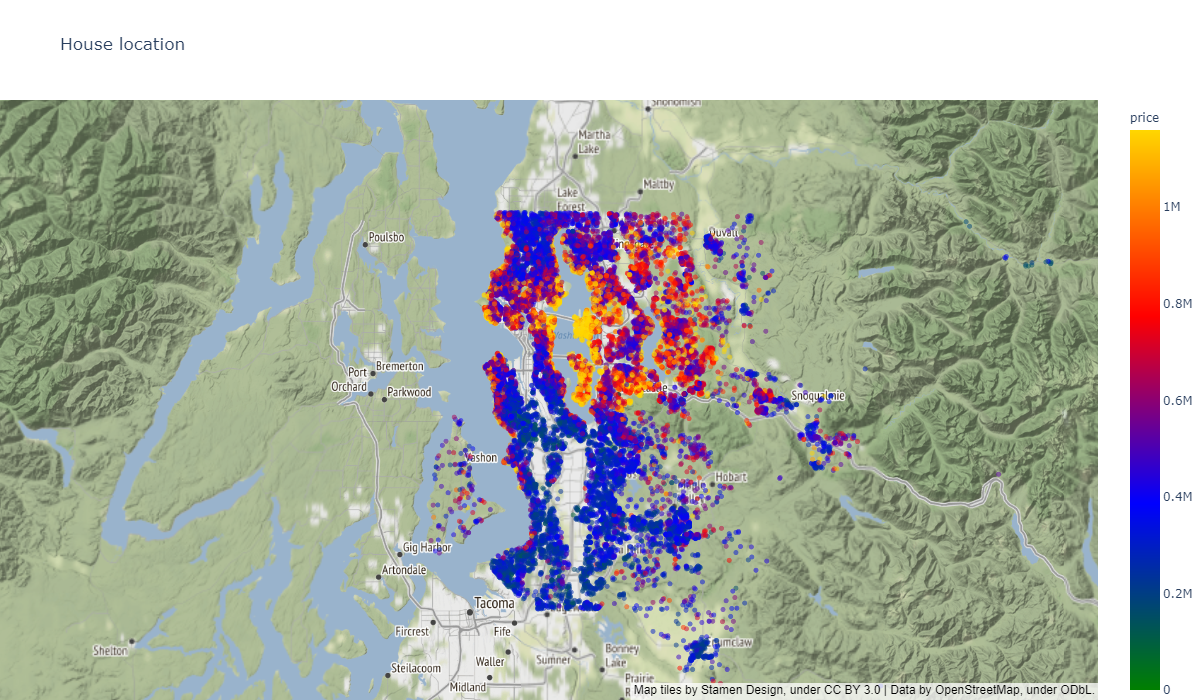

In [80]:
get_location_static()

Most expensive graphs are centered around downtown Seattle.

In [81]:
# # to get a interactive version of this uncomment this and run
# get_location_interactive()

#### Average Price by Zipcode

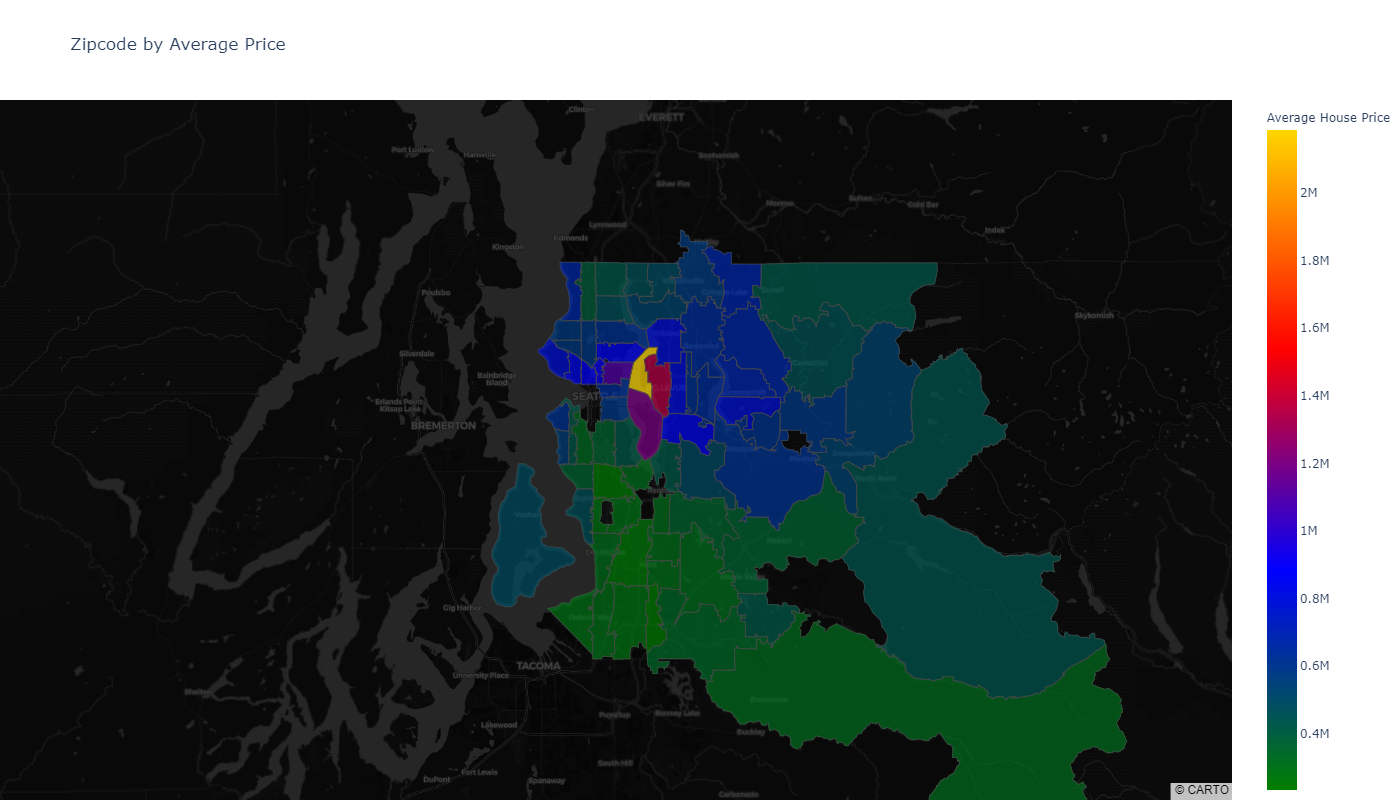

In [83]:
average_price_by_zipcode_static()

In [84]:
# # to get a interactive version of this uncomment this and run
# average_price_by_zipcode_interactive()

In [85]:
df_mean_price_per_sqft_by_zip = df.groupby(by='zipcode').mean().reset_index()[[
    'zipcode', 'price_per_sqft'
]].sort_values(by='price_per_sqft', ascending=False).reset_index(drop='index')
df_mean_price_per_sqft_by_zip

zipcode  price_per_sqft
0     98102      173.003942
1     98119      161.332989
2     98109      160.549817
3     98112      152.387873
4     98107      137.061856
..      ...             ...
65    98010       18.455051
66    98022       18.301974
67    98014       15.488130
68    98024       14.706456
69    98070       13.748276

[70 rows x 2 columns]

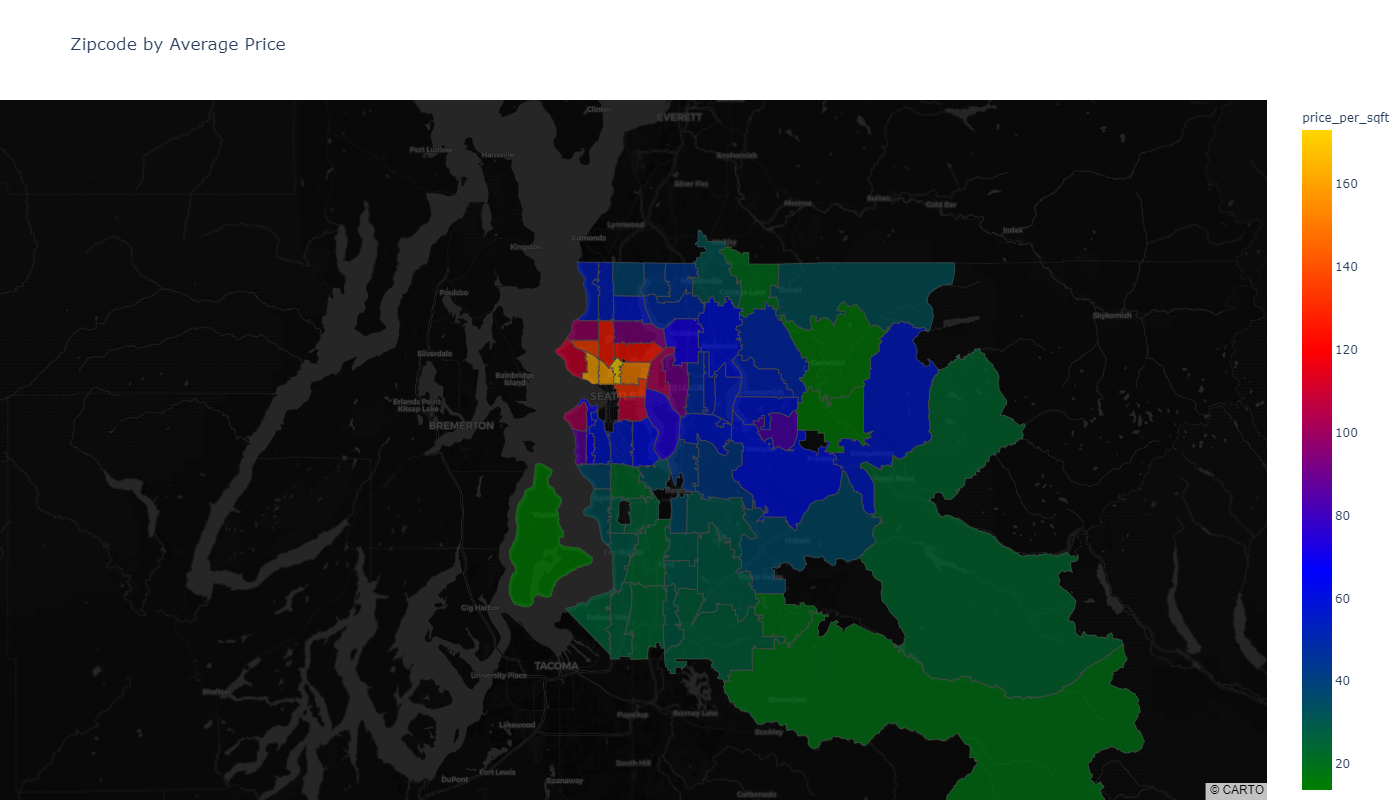

In [86]:
average_price_per_sqft_by_zipcode_static()

What price to expect when selling.

## Remove outliers


____________________________________________________________
DataFrame Columns Boxplot
____________________________________________________________


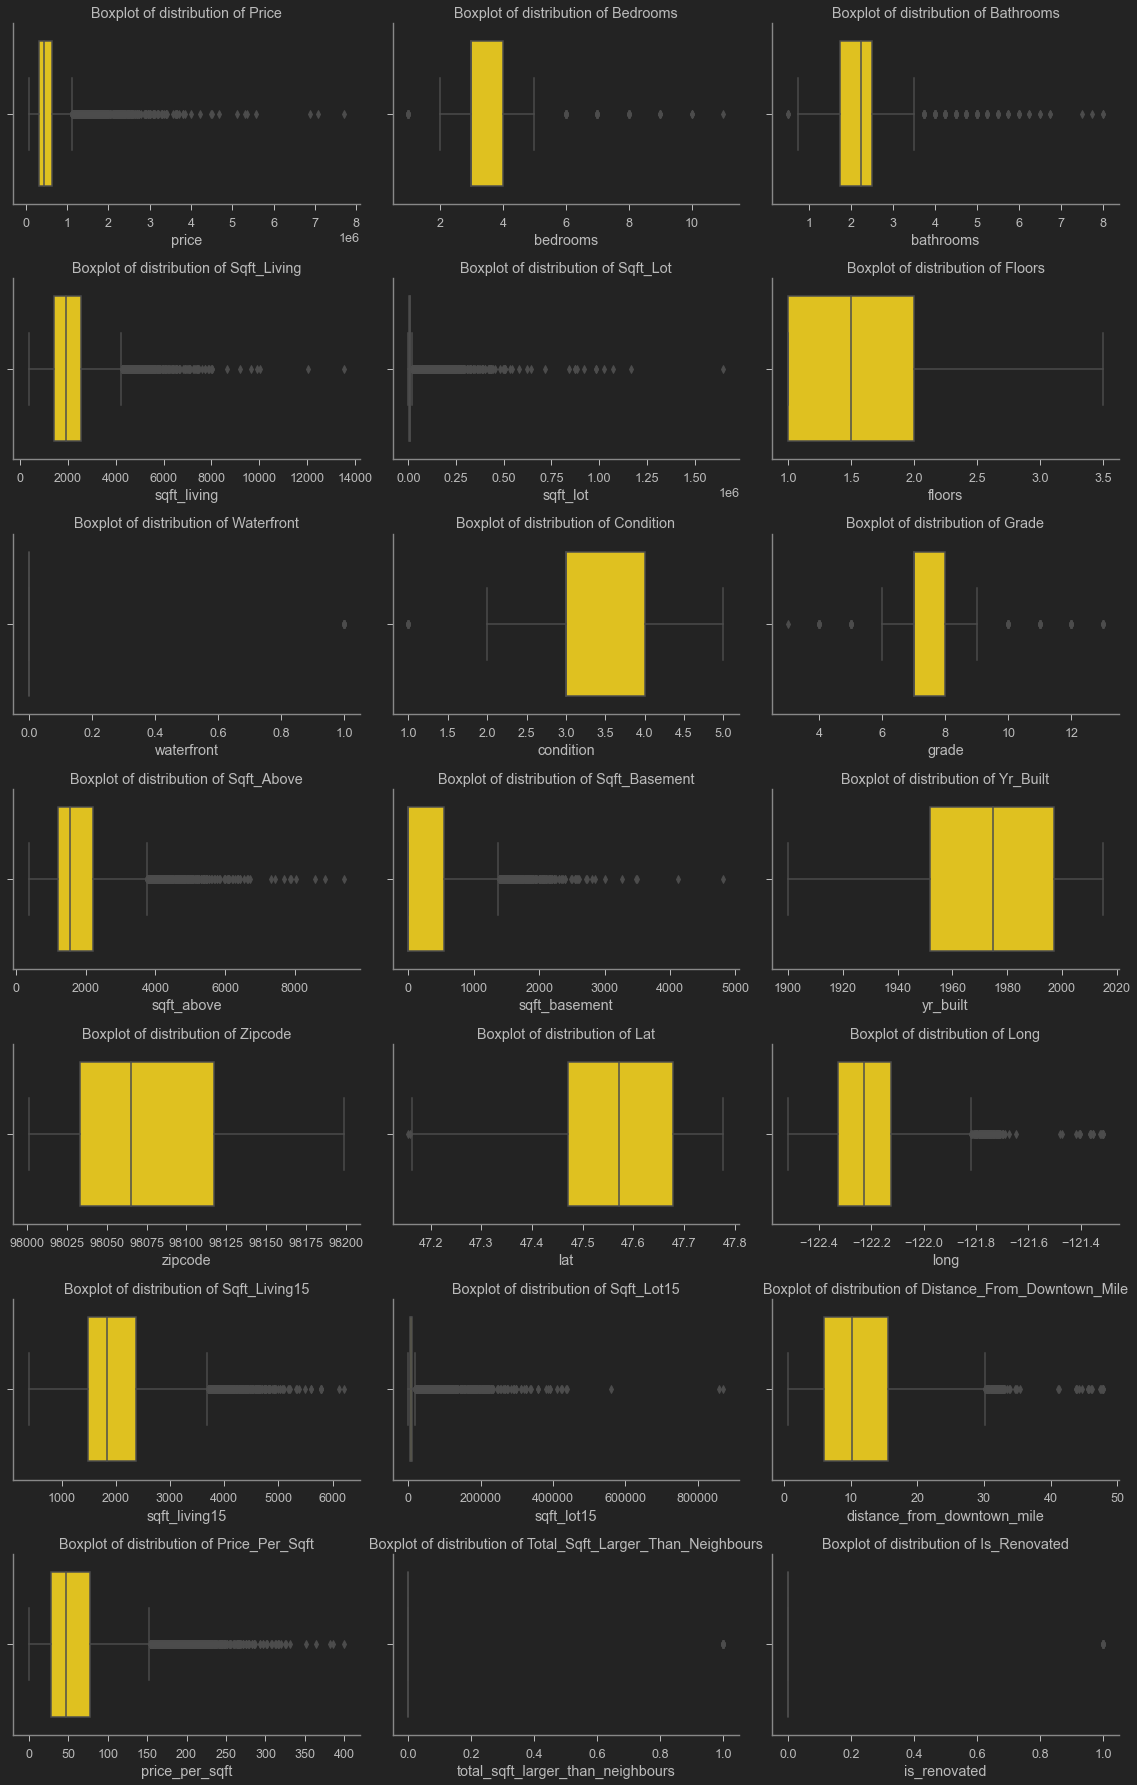

In [87]:
check_outliers_in_df(df=df_model,show_dfs=False)

From the chart potential candidate for formula based out lier removal are:
- price
- bathrooms
- bathrooms
- sqft_living
- sqft_lot
- floors
- condition
- sqft_above
- sqft_basement

And for manual outlier removal: 
- distance_from_downtown_mile

Price data loss from original dataset using IQR 5.37 %
Price data loss from original dataset using Z 1.88 %
________________________________________________________________________________________________________________________________________________________________


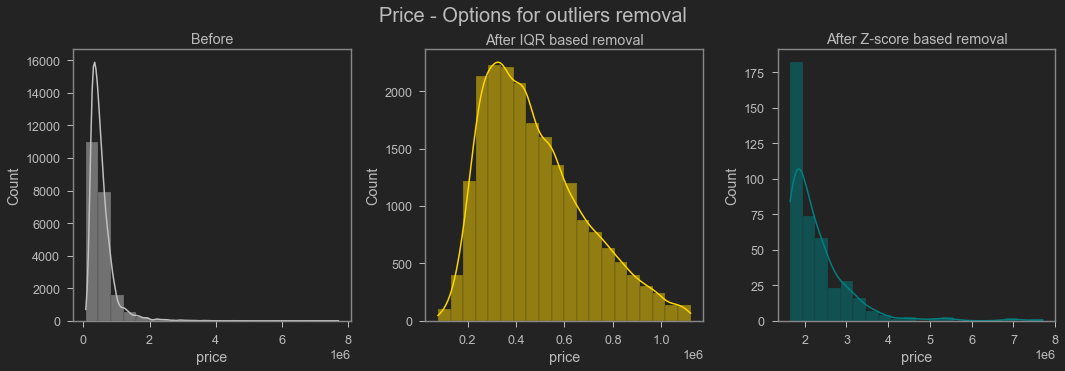

Bathrooms data loss from original dataset using IQR 2.61 %
Bathrooms data loss from original dataset using Z 1.88 %
________________________________________________________________________________________________________________________________________________________________


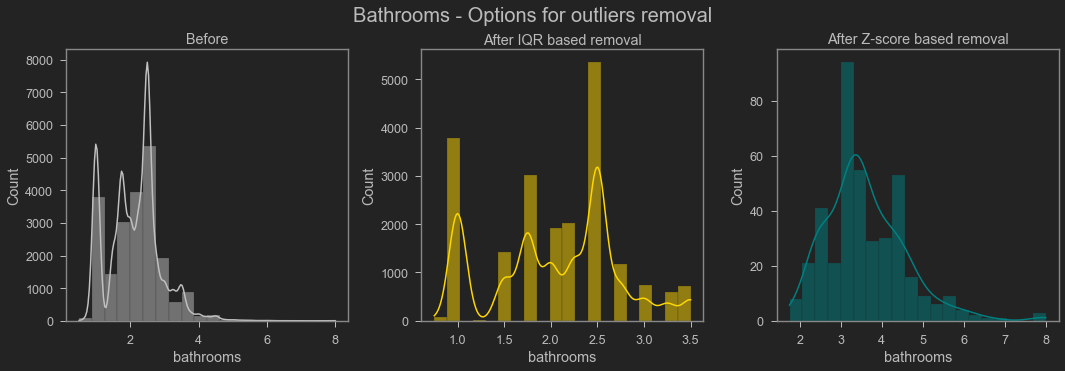

Bathrooms data loss from original dataset using IQR 2.61 %
Bathrooms data loss from original dataset using Z 1.88 %
________________________________________________________________________________________________________________________________________________________________


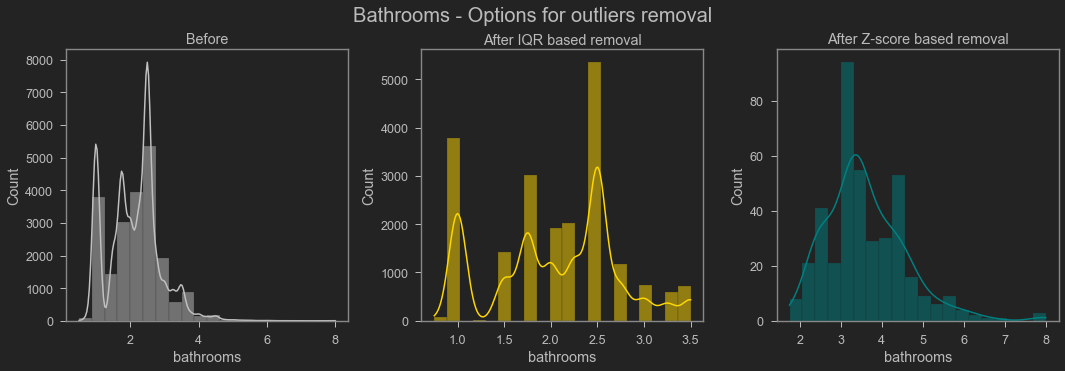

Sqft_Living data loss from original dataset using IQR 2.65 %
Sqft_Living data loss from original dataset using Z 1.88 %
________________________________________________________________________________________________________________________________________________________________


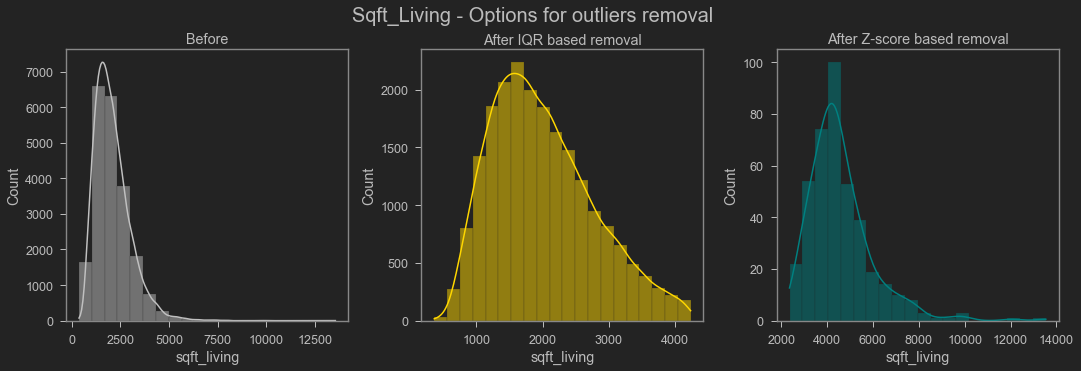

Sqft_Lot data loss from original dataset using IQR 11.23 %
Sqft_Lot data loss from original dataset using Z 1.88 %
________________________________________________________________________________________________________________________________________________________________


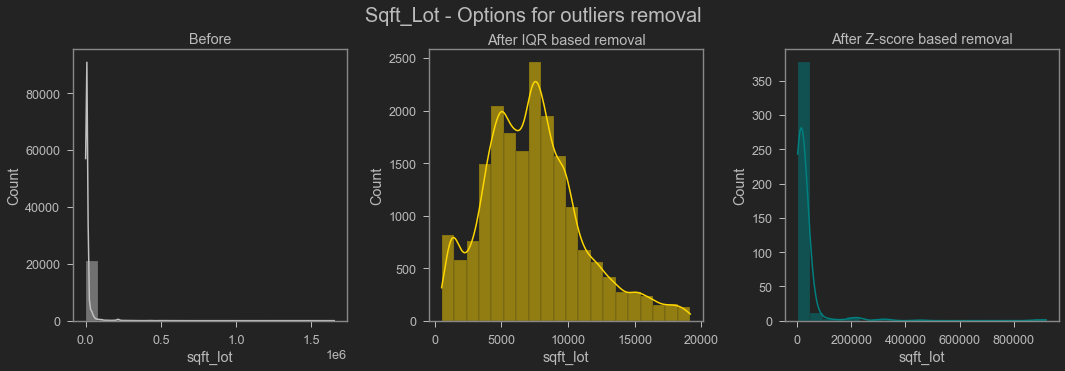

Floors data loss from original dataset using IQR 0.0 %
Floors data loss from original dataset using Z 1.88 %
________________________________________________________________________________________________________________________________________________________________


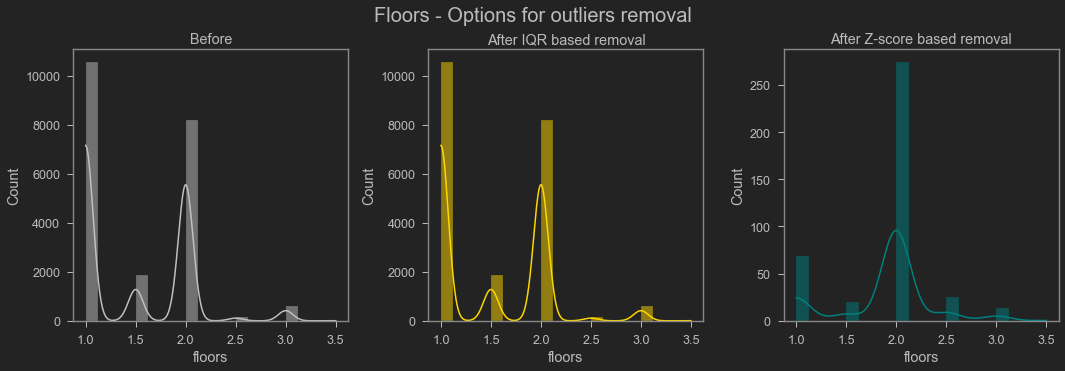

Condition data loss from original dataset using IQR 0.13 %
Condition data loss from original dataset using Z 1.88 %
________________________________________________________________________________________________________________________________________________________________


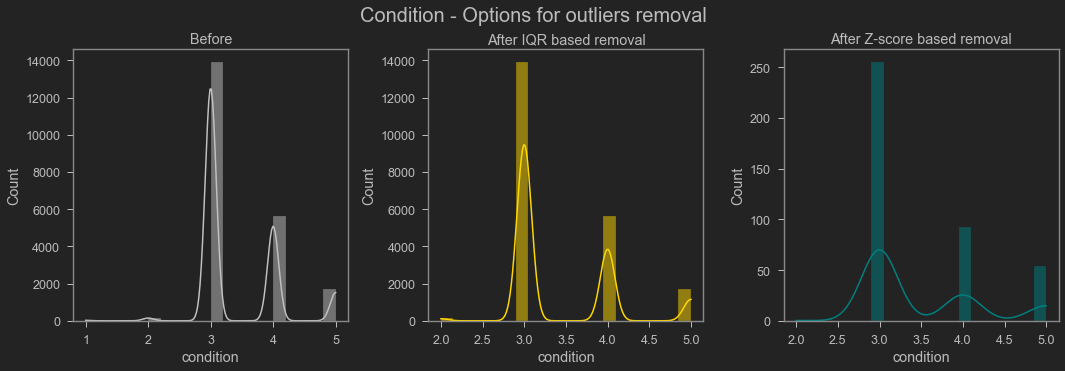

Sqft_Above data loss from original dataset using IQR 2.8 %
Sqft_Above data loss from original dataset using Z 1.88 %
________________________________________________________________________________________________________________________________________________________________


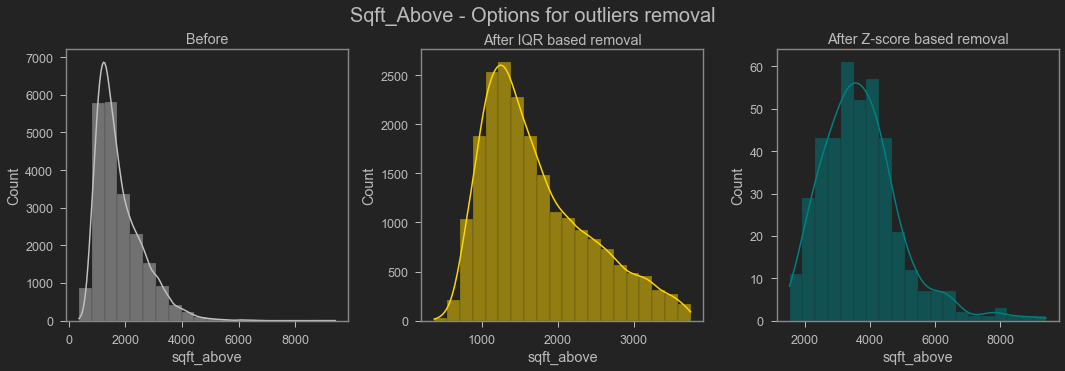

Sqft_Basement data loss from original dataset using IQR 2.6 %
Sqft_Basement data loss from original dataset using Z 1.88 %
________________________________________________________________________________________________________________________________________________________________


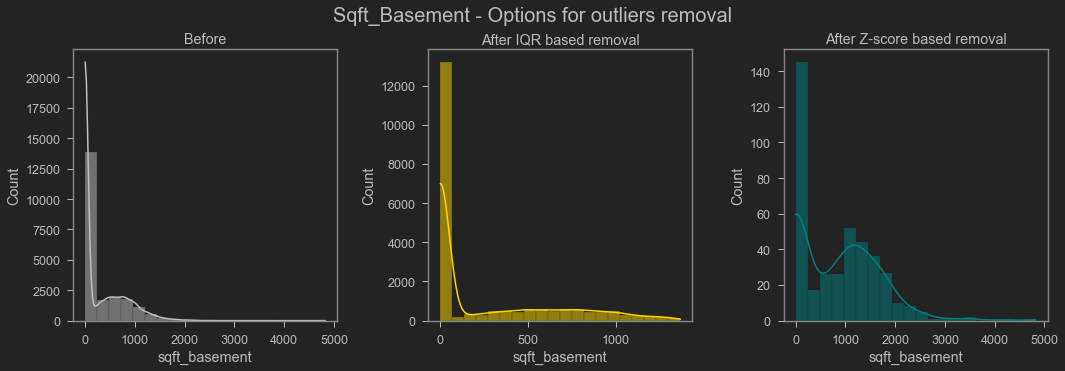

In [89]:
for item in to_remove_outliers_from:
    IQR_df = df_model[find_outliers_IQR(df_model[item])]
    IQR_df_ = df_model[~find_outliers_IQR(df_model[item])]
    print(item.title(), "data loss from original dataset using IQR",
          round((len(IQR_df) / len(df_model)) * 100, 2), '%')
    Z_price_price = df_model[find_outliers_Z(df_model['price'])]
    Z_price_price_ = df_model[find_outliers_Z(df_model['price'])]
    print(item.title(), "data loss from original dataset using Z",
          round((len(Z_price_price) / len(df_model)) * 100, 2), '%')
    # left
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    sns.histplot(data=df_model, x=item, color='silver', bins=20, kde=True)
    plt.title('Before')
    # middle
    plt.subplot(1, 3, 2)
    sns.histplot(data=IQR_df_, x=item, color='gold', bins=20, kde=True)
    plt.title('After IQR based removal')
    # right
    plt.subplot(1, 3, 3)
    sns.histplot(data=Z_price_price_, x=item, color='teal', bins=20, kde=True)
    plt.title('After Z-score based removal')
    plt.tight_layout()
    plt.suptitle(f'{item.title()} - Options for outliers removal',
                 va='bottom',
                 fontsize=20)
    print(f'{"_"*160}')
    plt.show()

Across the board outlier removal by using IQR is the winner. Now removing those outliers. bathroom,sqft-basement can use Z-score. Maybe later.

In [92]:
# droping data and generating info
n = 0
while n < len(to_remove_outliers_from):
    print("Dropping Data".capitalize())
    print(f'{"_"*160}')
    for item in to_remove_outliers_from:
        print(item.capitalize())
        dropped_rows= len(df_model_2[find_outliers_IQR(df_model_2[item])])
        original_rows = len(df_model_2)
        
        df_model_2 = df_model_2[~find_outliers_IQR(df_model_2.price)]
        print(f'   Data dropped: {dropped_rows}')
        print(f'   Data loss : {round((dropped_rows/original_rows)*100,4)}%')
        
        n = n+1
    print(f'{"_"*160}')

Dropping data
________________________________________________________________________________________________________________________________________________________________
Price
   Data dropped: 1151
   Data loss : 5.3737%
Bathrooms
   Data dropped: 99
   Data loss : 0.4885%
Bathrooms
   Data dropped: 89
   Data loss : 0.4448%
Sqft_living
   Data dropped: 265
   Data loss : 1.3255%
Sqft_lot
   Data dropped: 2168
   Data loss : 10.8438%
Floors
   Data dropped: 0
   Data loss : 0.0%
Condition
   Data dropped: 27
   Data loss : 0.135%
Sqft_above
   Data dropped: 447
   Data loss : 2.2358%
Sqft_basement
   Data dropped: 523
   Data loss : 2.6159%
________________________________________________________________________________________________________________________________________________________________


In [93]:
len_new = len(df_model_2)
len_old = len(df_model)
print('New utlier removed dataset length:', len_new)
print('Old dataset length:', len_old)
print(f'Total data loss: {round(abs((np.log(len_new/len_old)*100)),2)}%')
df_model_2

New utlier removed dataset length: 19993
Old dataset length: 21419
Total data loss: 6.89%


price  bedrooms  ...  total_sqft_larger_than_neighbours  is_renovated
0      221900.0         3  ...                                  0             0
1      538000.0         3  ...                                  0             1
2      180000.0         2  ...                                  0             0
3      604000.0         4  ...                                  0             0
4      510000.0         3  ...                                  0             0
...         ...       ...  ...                                ...           ...
21414  360000.0         3  ...                                  0             0
21415  400000.0         4  ...                                  0             0
21416  402101.0         2  ...                                  0             0
21417  400000.0         3  ...                                  0             0
21418  325000.0         2  ...                                  0             0

[19993 rows x 21 columns]

There are few extremely big values in distance_from_downtown feature, now removing this. Thresh hold is more than 40 miles will be dropped.

In [94]:
print('Outliers:',len(df_model_2[(df_model_2['distance_from_downtown_mile']>40)]))
df_model_2[(df_model_2['distance_from_downtown_mile']>40)]

Outliers: 18


price  bedrooms  ...  total_sqft_larger_than_neighbours  is_renovated
2564   134000.0         2  ...                                  0             1
2901   167000.0         1  ...                                  0             0
3266   380000.0         3  ...                                  0             0
4164   150000.0         3  ...                                  0             0
4808   525000.0         3  ...                                  0             0
5814   175000.0         2  ...                                  0             0
6035   150000.0         3  ...                                  1             0
9999   200000.0         2  ...                                  0             0
10794  241000.0         2  ...                                  0             0
12942  155000.0         2  ...                                  0             0
13118  375000.0         3  ...                                  0             0
13856  370000.0         2  ...                                  0             0
14471  160000.0         3  ...                                  0             0
16677  170000.0         1  ...                                  1             0
16776  160000.0         3  ...                                  0             0
19462  155000.0         3  ...                                  0             0
19792  415000.0         3  ...                                  0             0
21193  320000.0         3  ...                                  0             0

[18 rows x 21 columns]

In [95]:
df_model_2 = df_model_2[~(df_model_2['distance_from_downtown_mile']>40)]
df_model_2

price  bedrooms  ...  total_sqft_larger_than_neighbours  is_renovated
0      221900.0         3  ...                                  0             0
1      538000.0         3  ...                                  0             1
2      180000.0         2  ...                                  0             0
3      604000.0         4  ...                                  0             0
4      510000.0         3  ...                                  0             0
...         ...       ...  ...                                ...           ...
21414  360000.0         3  ...                                  0             0
21415  400000.0         4  ...                                  0             0
21416  402101.0         2  ...                                  0             0
21417  400000.0         3  ...                                  0             0
21418  325000.0         2  ...                                  0             0

[19975 rows x 21 columns]

## Ordinary Least Squares

In [100]:
def OLS_sm(df,
           dependant_var='price',
           numeric_features=[],
           categorical_features=[],
           verbose=False,
           show_summary=True,
           show_plots=True,
           target_is_dollar=True):
    """
    ### Uses formula based statsmodels regression for OLS. ###
    
    Displays a statsmodels.iolib.summary.Summary object containing summary of OLS analysis. 
    Returns a statsmodels.regression.linear_model.RegressionResultsWrapper which can be used to access other options available.

    Parameters:
    ===========
        df = pandas.DataFrame; no default. 
                Input dataset to use for OLS.
        dependant_var = str; default: 'price'. 
                Dependent variable.
        numeric_features = list; default = []. 
                Identify numeric features.
        categorical_features = list; default = []. 
                Identify categorical features.
        verbose = boolean; default: False. 
                Shows some formula used and drop information.
                    `True` shows information.
                    `False` does not show information.
        show_summary = boolean; default: False. 
                Shows summary report.
                    `True` shows information.
                    `False` does not show information.
        show_plots = boolean; default: True. 
                Shows summary and Homoscedasticity information.
                    `True` shows information.
                    `False` does not show information.
        target_is_dollar = boolean; default: True. 
                Modify chart axis label.
                    `True` shows information.
                    `False` does not show information.    
    Under-The-Hood:
    =============
    --{Major Steps}--
        
        ## Regression
        cate = ' + '.join([f'C({x})' for x in categorical_features])
        nume = ' + '.join([f'{x}' for x in numeric_features])
        formula = f'{dependant_var} ~ {nume} + {cate}'
        
        ## plots
        # plot on the left
        sm.qqplot(multiple_regression.resid,
                  dist=stats.norm,
                  line='45',
                  fit=True,
                  ax=ax1)
        # plot on the right
        ax2.scatter(x=multiple_regression.fittedvalues,
                    y=multiple_regression.resid,
                    s=4,
                    color='gold')
    
    Note:
    =====
        Make sure that every column in the DataFrame has the correct dtype.
        Numeric values stored as str (i.e, object) will make stats model assume that those are categorical variable.
        If Erros, check df to see if the passed feature is available in the DataFrame.
    
    Issues:
    =======
        - Output control is not clear.
    
    Changelog:
    ==========
        - fixed `resid`, was using `resid_pearson`.
    
    -- ver: 1.2 --
    """
    cate = ' + '.join([f'C({x})' for x in categorical_features])
    nume = ' + '.join([f'{x}' for x in numeric_features])
    if len(cate)==0:
        formula = f'{dependant_var} ~ {nume}'
    else:
        formula = f'{dependant_var} ~ {nume} + {cate}'
    print('Formula for the OLS model: ', formula)
    # OLS regressor
    multiple_regression = smf.ols(formula=formula, data=df).fit()

    if verbose:
        show_summary = True
        show_plots = True

    if show_summary:
        display(multiple_regression.summary())
    if show_plots:
        # plotting
        # plot 1
        fig, (ax1,
              ax2) = plt.subplots(ncols=2,
                                  figsize=(10, 5),
                                  gridspec_kw={'width_ratios': [0.6, 0.4]})
        sm.qqplot(multiple_regression.resid,
                  dist=stats.norm,
                  line='45',
                  fit=True,
                  ax=ax1)
        ax1.set_title('Q-Q Plot', fontdict={"size": 15})
        # plot 2
        # uses The predicted values for the original (unwhitened) design.
        ax2.scatter(x=multiple_regression.fittedvalues, 
                    y=multiple_regression.resid,
                    s=4,
                    color='gold')
        if target_is_dollar:
            ax2.yaxis.set_major_formatter(format_number)
        ax2.set(xlabel='Predicted', ylabel='Residuals')
        ax2.axhline(y=0, c='r', lw=4, ls='--')
        ax2.set_title('Predicted VS Residuals', fontdict={"size": 15})
        plt.suptitle('Visual Check of Residuals for Homoscedasticity',
                     ha='center',
                     va='bottom',
                     fontdict={"size": 25})
        plt.tight_layout()
    if verbose == False and show_summary == False and show_plots == True:
        print('r_sq:', round(multiple_regression.rsquared, 4))
    return multiple_regression

Lets take a quick look at a regression.

>>> With outlier

Formula for the OLS model:  price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + sqft_above + sqft_basement + yr_built + lat + long + sqft_living15 + sqft_lot15 + distance_from_downtown_mile + price_per_sqft + C(waterfront) + C(condition) + C(grade) + C(is_renovated) + C(zipcode) + C(total_sqft_larger_than_neighbours)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1223.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:42:02   Log-Likelihood:            -2.8446e+05
No. Observations:               21419   AIC:                         5.691e+05
Df Residuals:                   21318   BIC:                         5.699e+05
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                  1.127e+07   7.74e+06      1.456      0.145   -3.91e+06    2.65e+07
C(waterfront)[T.1]                         7.249e+05   1.24e+04     58.616      0.000    7.01e+05    7.49e+05
C(condition)[T.2]                          5.079e+04   2.92e+04      1.738      0.082   -6499.167    1.08e+05
C(condition)[T.3]                          5.362e+04   2.72e+04      1.974      0.048     373.573    1.07e+05
C(condition)[T.4]                          7.731e+04   2.72e+04      2.844      0.004     2.4e+04    1.31e+05
C(condition)[T.5]                          1.037e+05   2.74e+04      3.790      0.000    5.01e+04    1.57e+05
C(grade)[T.4]                             -7.859e+04   1.45e+05     -0.542      0.588   -3.63e+05    2.06e+05
C(grade)[T.5]                             -1.269e+05   1.43e+05     -0.889      0.374   -4.07e+05    1.53e+05
C(grade)[T.6]                             -1.265e+05   1.42e+05     -0.888      0.374   -4.06e+05    1.53e+05
C(grade)[T.7]                             -1.286e+05   1.42e+05     -0.903      0.367   -4.08e+05    1.51e+05
C(grade)[T.8]                             -1.179e+05   1.43e+05     -0.827      0.408   -3.97e+05    1.61e+05
C(grade)[T.9]                              -5.76e+04   1.43e+05     -0.404      0.686   -3.37e+05    2.22e+05
C(grade)[T.10]                             5.773e+04   1.43e+05      0.405      0.686   -2.22e+05    3.37e+05
C(grade)[T.11]                             2.338e+05   1.43e+05      1.636      0.102   -4.62e+04    5.14e+05
C(grade)[T.12]                             6.467e+05   1.44e+05      4.502      0.000    3.65e+05    9.28e+05
C(grade)[T.13]                             1.682e+06   1.49e+05     11.323      0.000    1.39e+06    1.97e+06
C(is_renovated)[T.1]                       4.426e+04   5712.285      7.748      0.000    3.31e+04    5.55e+04
C(zipcode)[T.98002]                       -1.887e+04    1.3e+04     -1.455      0.146   -4.43e+04    6548.366
C(zipcode)[T.98003]                       -1.257e+04   1.16e+04     -1.088      0.277   -3.52e+04    1.01e+04
C(zipcode)[T.98004]                        4.921e+05   2.41e+04     20.409      0.000    4.45e+05    5.39e+05
C(zipcode)[T.98005]                        1.299e+05   2.52e+04      5.153      0.000    8.05e+04    1.79e+05
C(zipcode)[T.98006]                        9.943e+04   2.18e+04      4.553      0.000    5.66e+04    1.42e+05
C(zipcode)[T.98007]                        7.988e+04   2.58e+04      3.095      0.002    2.93e+04     1.3e+05
C(zipcode)[T.98008]                        9.921e+04   2.46e+04      4.034      0.000     5.1e+04    1.47e+05
C(zipcode)[T.98010]                        3.731e+04   2.04e+04      1.827      0.068   -2726.394    7.74e+04
C(z

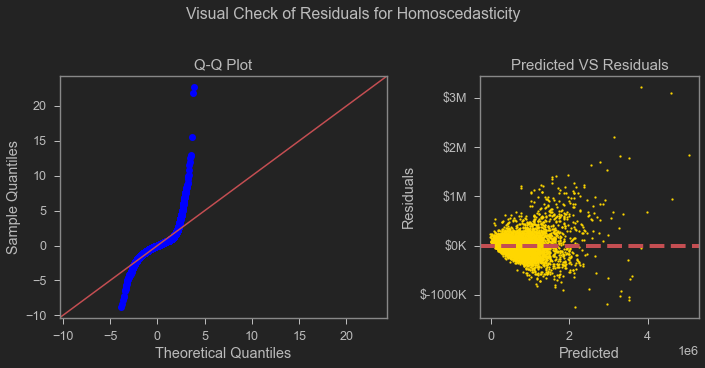

In [101]:
x1 = OLS_sm(df=df_model,
              numeric_features=[
                  'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                  'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long',
                  'sqft_living15', 'sqft_lot15', 'distance_from_downtown_mile',
                  'price_per_sqft'
              ],
              dependant_var='price',
              categorical_features=[
                  'waterfront', 'condition', 'grade', 'is_renovated',
                  'zipcode', 'total_sqft_larger_than_neighbours'
              ],
              verbose=False)

In [102]:
check_for_high_p_val(x1)

>>> With outliers dropped data

Formula for the OLS model:  price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + sqft_above + sqft_basement + yr_built + lat + long + sqft_living15 + sqft_lot15 + distance_from_downtown_mile + price_per_sqft + C(waterfront) + C(condition) + C(grade) + C(is_renovated) + C(zipcode) + C(total_sqft_larger_than_neighbours)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     1122.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:42:03   Log-Likelihood:            -2.5306e+05
No. Observations:               19975   AIC:                         5.063e+05
Df Residuals:                   19875   BIC:                         5.071e+05
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                  3.135e+07   4.55e+06      6.897      0.000    2.24e+07    4.03e+07
C(waterfront)[T.1]                          2.45e+05   1.14e+04     21.542      0.000    2.23e+05    2.67e+05
C(condition)[T.2]                          5.125e+04   1.61e+04      3.178      0.001    1.96e+04    8.29e+04
C(condition)[T.3]                          8.052e+04    1.5e+04      5.363      0.000    5.11e+04     1.1e+05
C(condition)[T.4]                           9.95e+04    1.5e+04      6.622      0.000    7.01e+04    1.29e+05
C(condition)[T.5]                          1.225e+05   1.51e+04      8.097      0.000    9.28e+04    1.52e+05
C(grade)[T.4]                             -9.869e+04   7.87e+04     -1.254      0.210   -2.53e+05    5.55e+04
C(grade)[T.5]                             -1.221e+05   7.74e+04     -1.577      0.115   -2.74e+05    2.97e+04
C(grade)[T.6]                             -1.103e+05   7.73e+04     -1.427      0.153   -2.62e+05    4.12e+04
C(grade)[T.7]                             -8.392e+04   7.73e+04     -1.086      0.277   -2.35e+05    6.75e+04
C(grade)[T.8]                             -4.933e+04   7.73e+04     -0.638      0.523   -2.01e+05    1.02e+05
C(grade)[T.9]                              9195.2162   7.73e+04      0.119      0.905   -1.42e+05    1.61e+05
C(grade)[T.10]                             4.201e+04   7.74e+04      0.543      0.587    -1.1e+05    1.94e+05
C(grade)[T.11]                             7.426e+04   7.78e+04      0.954      0.340   -7.82e+04    2.27e+05
C(grade)[T.12]                            -5.505e+04   8.94e+04     -0.616      0.538    -2.3e+05     1.2e+05
C(is_renovated)[T.1]                       2.685e+04   3405.891      7.882      0.000    2.02e+04    3.35e+04
C(zipcode)[T.98002]                       -1.687e+04   7102.867     -2.376      0.018   -3.08e+04   -2950.727
C(zipcode)[T.98003]                        -754.3807   6299.457     -0.120      0.905   -1.31e+04    1.16e+04
C(zipcode)[T.98004]                        2.966e+05   1.41e+04     20.997      0.000    2.69e+05    3.24e+05
C(zipcode)[T.98005]                        1.635e+05   1.41e+04     11.612      0.000    1.36e+05    1.91e+05
C(zipcode)[T.98006]                        1.189e+05   1.23e+04      9.687      0.000    9.49e+04    1.43e+05
C(zipcode)[T.98007]                          9.2e+04   1.44e+04      6.383      0.000    6.37e+04     1.2e+05
C(zipcode)[T.98008]                        9.018e+04   1.39e+04      6.498      0.000     6.3e+04    1.17e+05
C(zipcode)[T.98010]                        3.541e+04    1.2e+04      2.953      0.003    1.19e+04    5.89e+04
C(zipcode)[T.98011]                        4.075e+04   1.62e+04      2.521      0.012    9066.545    7.24e+04
C(z

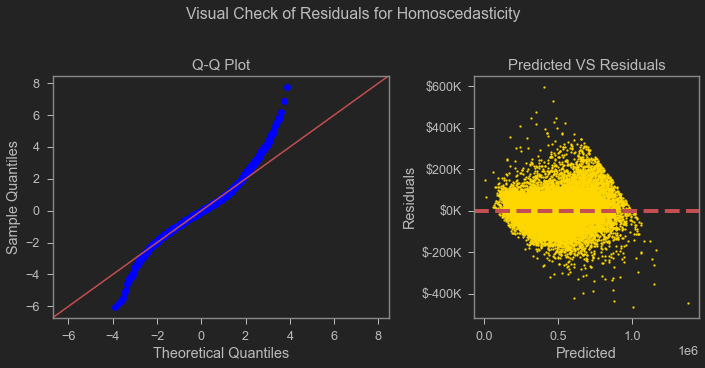

In [103]:
x2 = OLS_sm(df=df_model_2,
              numeric_features=[
                  'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                  'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long',
                  'sqft_living15', 'sqft_lot15', 'distance_from_downtown_mile',
                  'price_per_sqft'
              ],
              dependant_var='price',
              categorical_features=[
                  'waterfront', 'condition', 'grade', 'is_renovated',
                  'zipcode', 'total_sqft_larger_than_neighbours'
              ],
              verbose=False)

In [104]:
check_for_high_p_val(x2)

### Consider the above one as base model

It has features with high p value, and residual plots are very abnormal.

## Scaling

Robust statistics have good  performance when distributions  are not normal. These robust estimators typically have inferior statistical efficiency compared to conventional estimators for data drawn from a distribution without outliers (such as a normal distribution), but have superior efficiency for data drawn from a mixture distribution or from a heavy-tailed distribution, for which non-robust measures such as the standard deviation should not be used.

This matches the dataset characteristics.


### based on mean and IQR range

In [105]:
from sklearn.preprocessing import RobustScaler

In [106]:
scaler = RobustScaler()

In [107]:
# checkpoint
IQR__df = df_model_2.copy()

In [108]:
# this is out of order, and added while trouble interpreting results, continue from next block
IQR__df.reset_index(inplace=True)

X__price = IQR__df.drop(columns=['price','index'])
X_price_only = IQR__df[['price']]

# sans price
X_unscaled_pr = scaler.fit_transform(X__price)

df_for_last_step = pd.DataFrame(X_unscaled_pr,columns=X__price.columns)

df_for_last_step = pd.concat([X_price_only,df_for_last_step],axis=1)

In [109]:
# back to OG steps
IQR__df = df_model_2.copy()

In [110]:
# whole df
X_ = IQR__df
X = scaler.fit_transform(X_)

In [111]:
scaler.center_ #means

array([ 4.35000e+05,  3.00000e+00,  2.00000e+00,  1.85000e+03,
        7.50000e+03,  1.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.51000e+03,  0.00000e+00,  1.97400e+03,
        9.80650e+04,  4.75660e+01, -1.22232e+02,  1.80000e+03,
        7.52400e+03,  1.05800e+01,  4.47500e+01,  0.00000e+00,
        0.00000e+00])

In [112]:
scaler.scale_ #medians

array([2.8000e+05, 1.0000e+00, 1.0000e+00, 1.0200e+03, 5.2600e+03,
       1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 9.2000e+02,
       5.0000e+02, 4.4000e+01, 8.5000e+01, 2.2215e-01, 2.0700e-01,
       7.9000e+02, 4.7930e+03, 9.7050e+00, 4.5500e+01, 1.0000e+00,
       1.0000e+00])

In [113]:
X_df_ro = pd.DataFrame(X,columns=IQR__df.columns)
X_df_ro

price  bedrooms  ...  total_sqft_larger_than_neighbours  is_renovated
0     -0.761071       0.0  ...                                0.0           0.0
1      0.367857       0.0  ...                                0.0           1.0
2     -0.910714      -1.0  ...                                0.0           0.0
3      0.603571       1.0  ...                                0.0           0.0
4      0.267857       0.0  ...                                0.0           0.0
...         ...       ...  ...                                ...           ...
19970 -0.267857       0.0  ...                                0.0           0.0
19971 -0.125000       1.0  ...                                0.0           0.0
19972 -0.117496      -1.0  ...                                0.0           0.0
19973 -0.125000       0.0  ...                                0.0           0.0
19974 -0.392857      -1.0  ...                                0.0           0.0

[19975 rows x 21 columns]

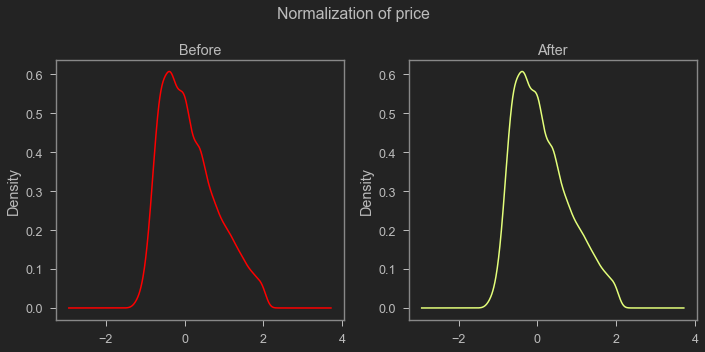

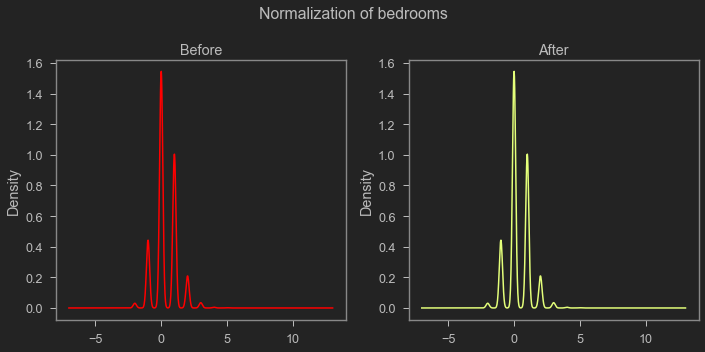

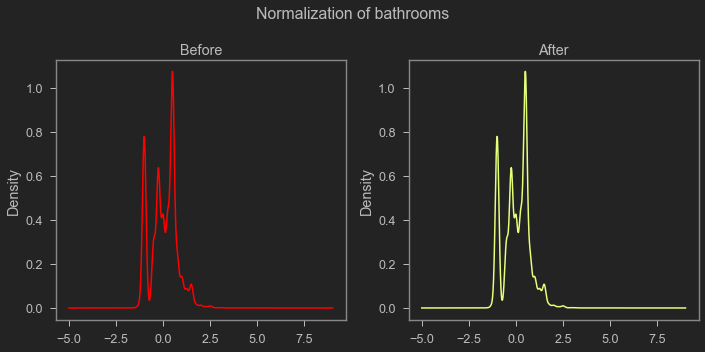

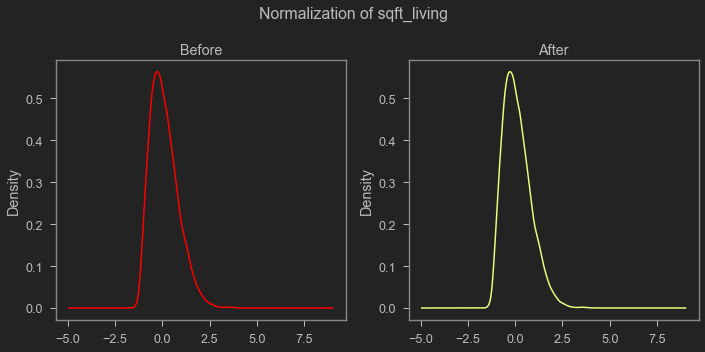

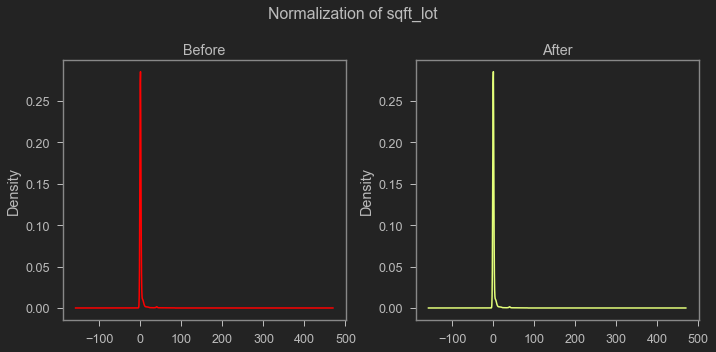

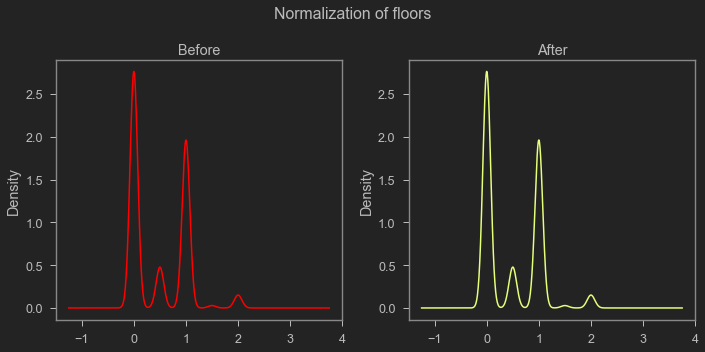

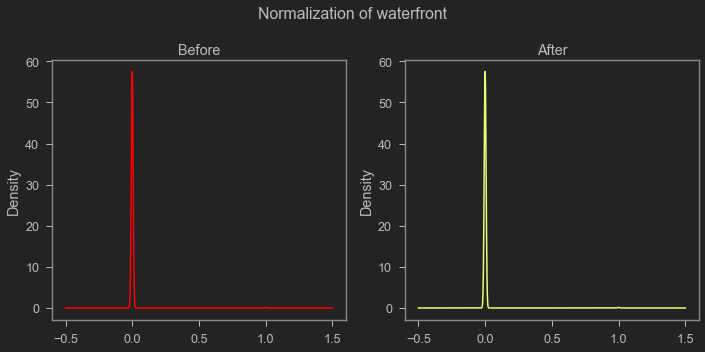

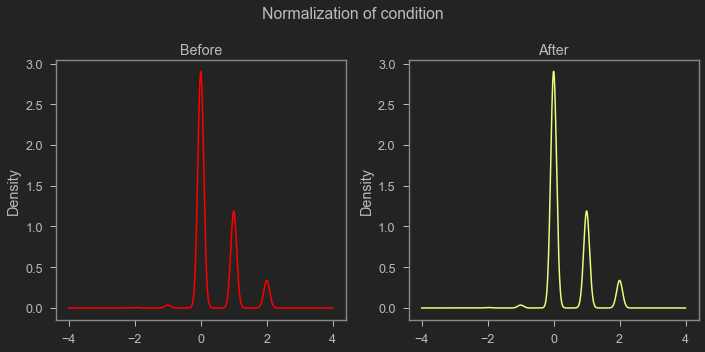

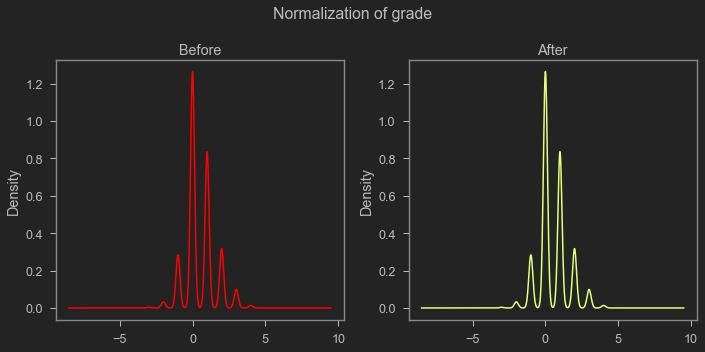

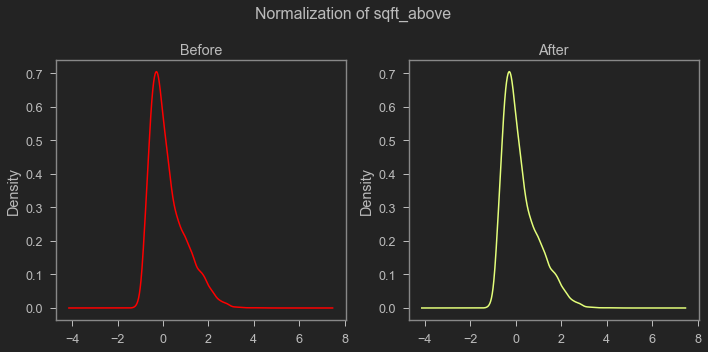

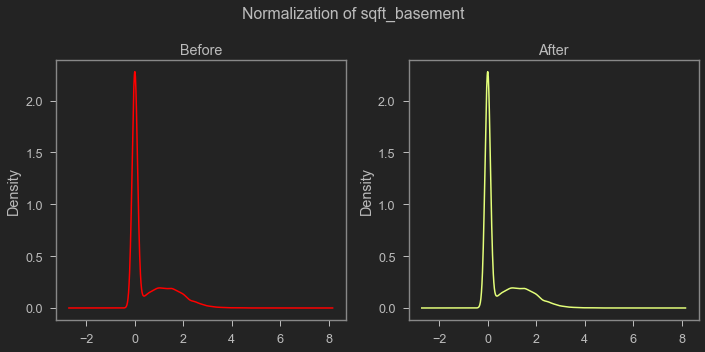

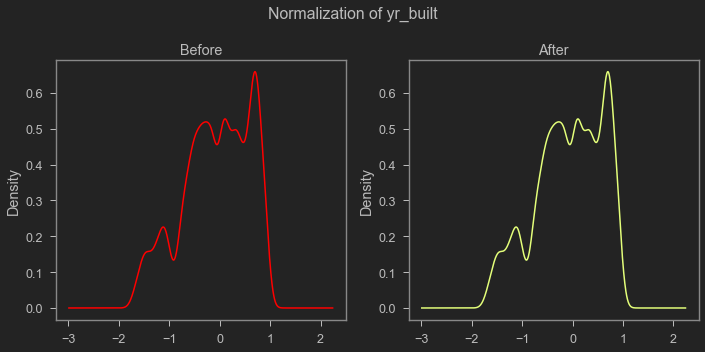

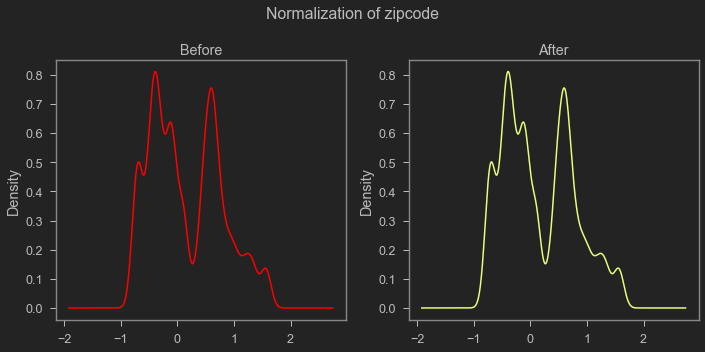

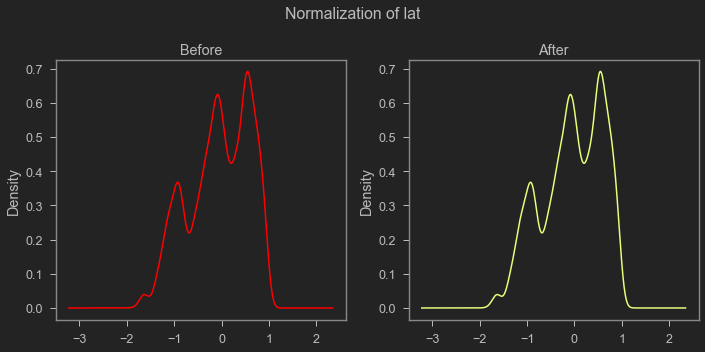

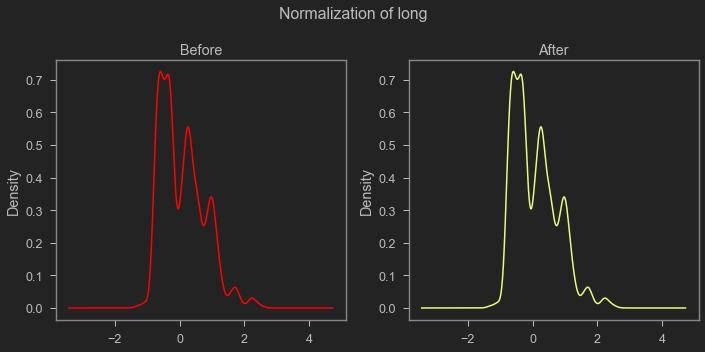

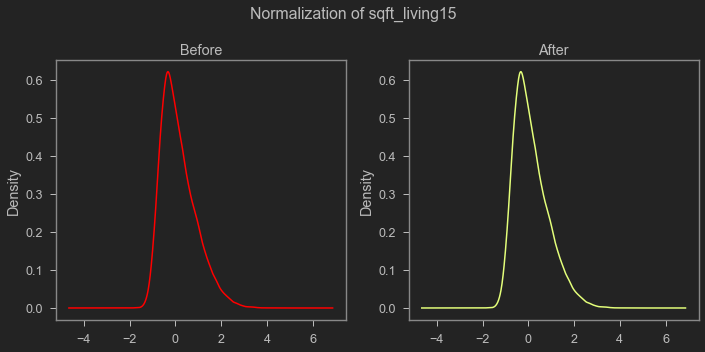

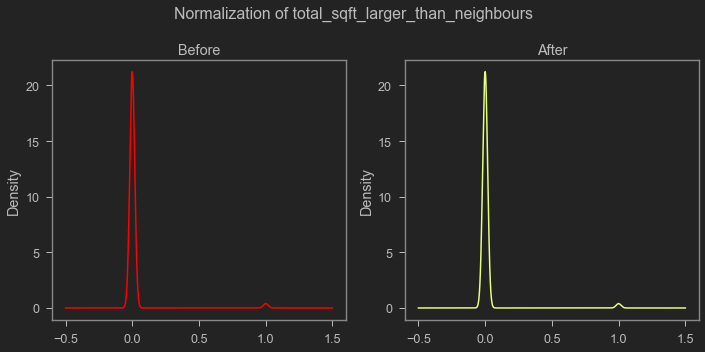

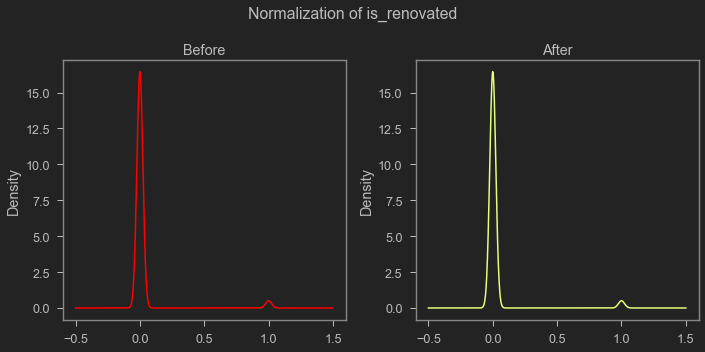

In [114]:
for column in X_df_ro:
    fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
    X_df_ro[column].plot(kind='kde',title='Before',colormap='hsv',ax=ax1)
    X_df_ro[column].plot(kind='kde',title='After',colormap='Wistia',ax=ax2)
    plt.suptitle(f'Normalization of {column}')
    plt.tight_layout()
    plt.show()

### Based on Z score

In [115]:
Z__df = df_model_2.copy()

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
scaler = StandardScaler()
X_ = Z__df
X = scaler.fit_transform(X_)

In [118]:
X_df_Z = pd.DataFrame(X,columns=Z__df.columns)

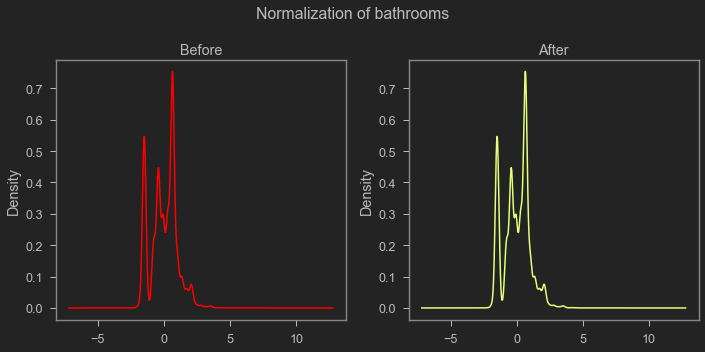

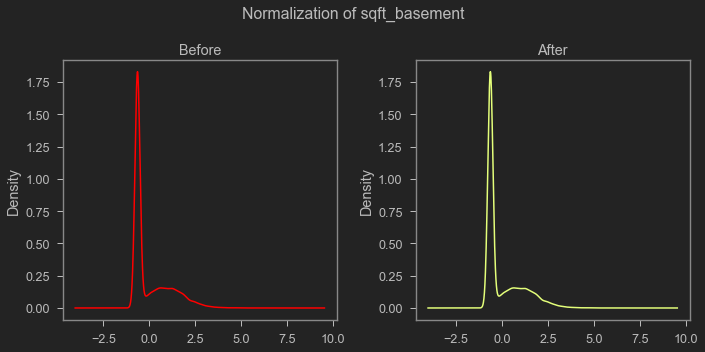

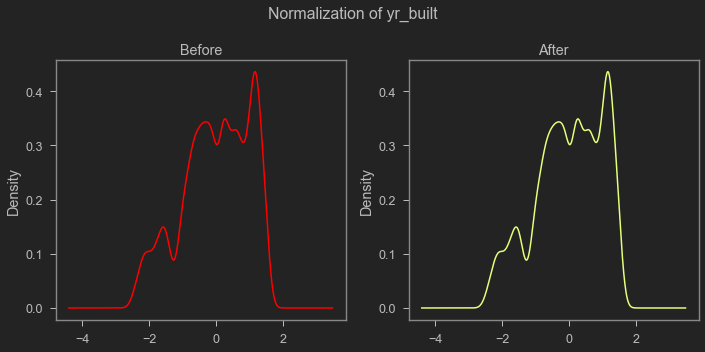

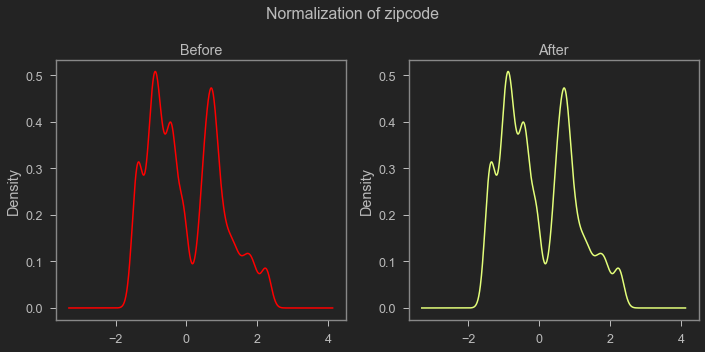

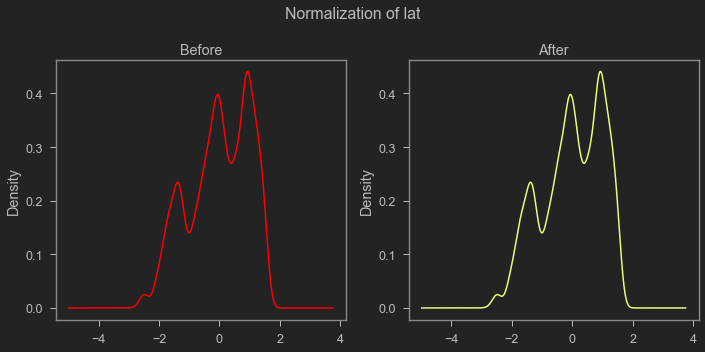

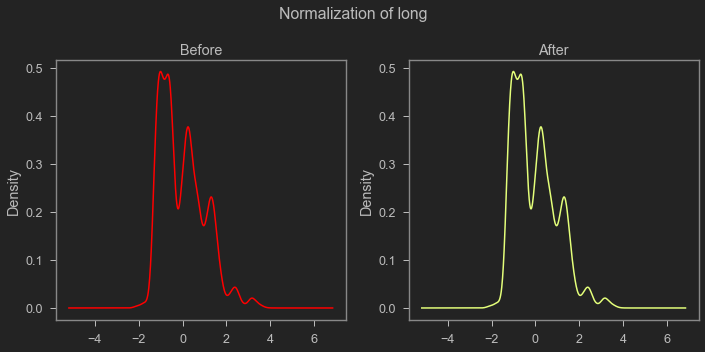

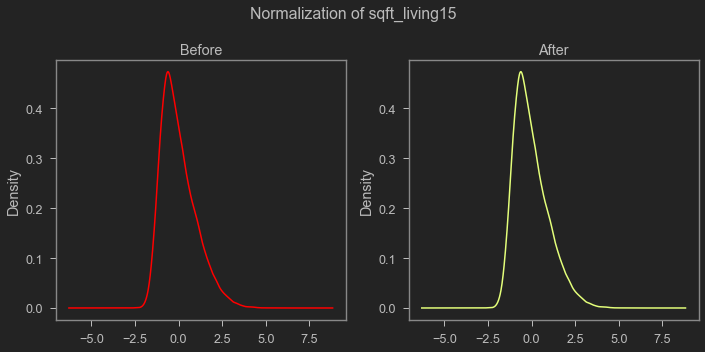

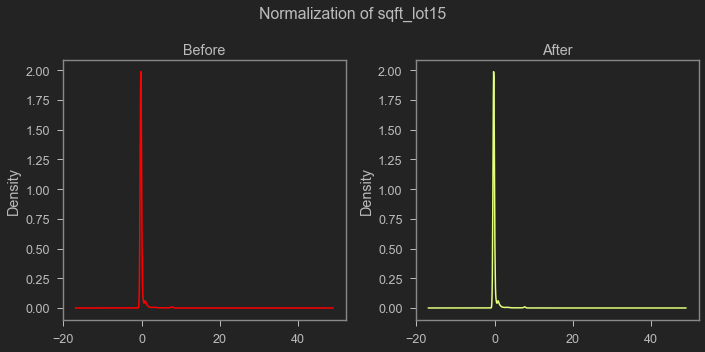

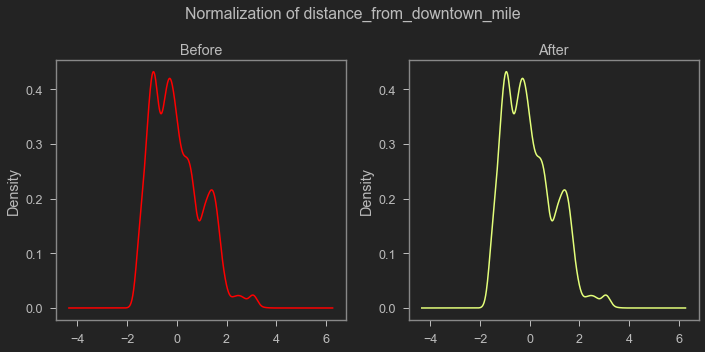

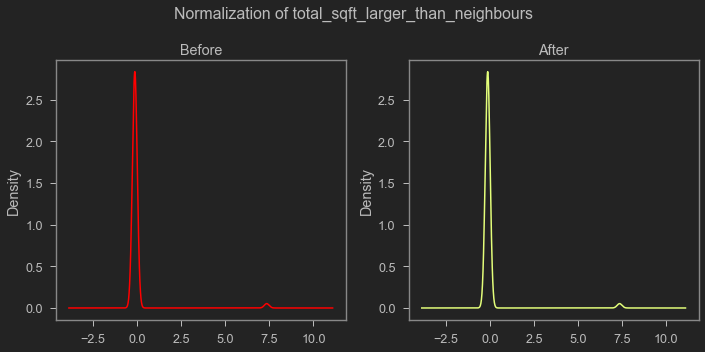

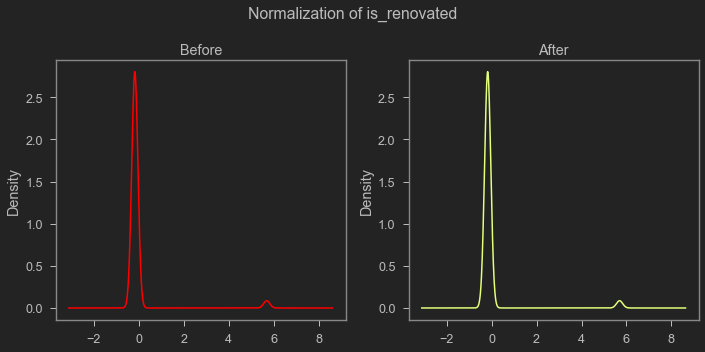

In [119]:
for column in X_df_Z:
    fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
    X_df_Z[column].plot(kind='kde',title='Before',colormap='hsv',ax=ax1)
    X_df_Z[column].plot(kind='kde',title='After',colormap='Wistia',ax=ax2)
    plt.suptitle(f'Normalization of {column}')
    plt.tight_layout()
    plt.show()

In [120]:
X_df_Z

price  bedrooms  ...  total_sqft_larger_than_neighbours  is_renovated
0     -1.252728 -0.366484  ...                          -0.136048     -0.175674
1      0.349503 -0.366484  ...                          -0.136048      5.692364
2     -1.465108 -1.501272  ...                          -0.136048     -0.175674
3      0.684040  0.768304  ...                          -0.136048     -0.175674
4      0.207578 -0.366484  ...                          -0.136048     -0.175674
...         ...       ...  ...                                ...           ...
19970 -0.552734 -0.366484  ...                          -0.136048     -0.175674
19971 -0.349984  0.768304  ...                          -0.136048     -0.175674
19972 -0.339335 -1.501272  ...                          -0.136048     -0.175674
19973 -0.349984 -0.366484  ...                          -0.136048     -0.175674
19974 -0.730140 -1.501272  ...                          -0.136048     -0.175674

[19975 rows x 21 columns]

Scaling based on mean and IQR, it has better performance.

In [121]:
df_model_2 = None

In [122]:
df_model_2 = X_df_ro

In [123]:
df_model_2

price  bedrooms  ...  total_sqft_larger_than_neighbours  is_renovated
0     -0.761071       0.0  ...                                0.0           0.0
1      0.367857       0.0  ...                                0.0           1.0
2     -0.910714      -1.0  ...                                0.0           0.0
3      0.603571       1.0  ...                                0.0           0.0
4      0.267857       0.0  ...                                0.0           0.0
...         ...       ...  ...                                ...           ...
19970 -0.267857       0.0  ...                                0.0           0.0
19971 -0.125000       1.0  ...                                0.0           0.0
19972 -0.117496      -1.0  ...                                0.0           0.0
19973 -0.125000       0.0  ...                                0.0           0.0
19974 -0.392857      -1.0  ...                                0.0           0.0

[19975 rows x 21 columns]

## Check for multicolinerity

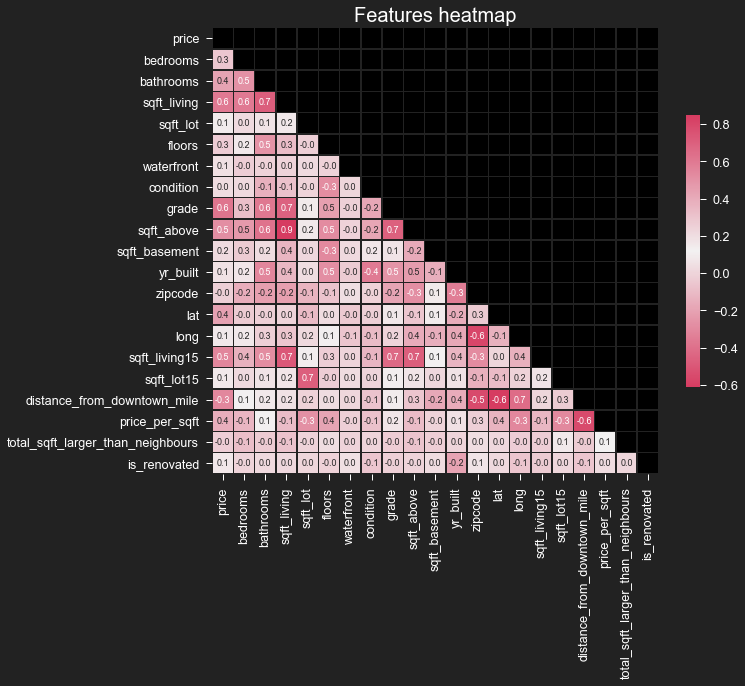

In [124]:
heatmap_DataFrame(df_model_2)

In [125]:
correlation_top_bottom(df_model_2.corr())

Positive correlations:
   index                         feature_combo  correlation
0     72            sqft_above and sqft_living     0.850184
1     78         sqft_living15 and sqft_living     0.731599
2    204          sqft_living15 and sqft_above     0.712493
3     45             bathrooms and sqft_living     0.711160
4    100               sqft_lot and sqft_lot15     0.704609
5    177                  grade and sqft_above     0.701205
6     71                 grade and sqft_living     0.694137
7    183               sqft_living15 and grade     0.662505
8    311  distance_from_downtown_mile and long     0.654559
9     51              bathrooms and sqft_above     0.632005

----------------------------------------------------------------------
Negative correlations:
   index                                   feature_combo  correlation
0    370             distance_from_downtown_mile and lat    -0.609103
1    290             lat and distance_from_downtown_mile    -0.609103
2    266    

In [126]:
def correlation_feat(df, threshold=0.75):
    feature_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]
                   ) > threshold:  # absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                feature_corr.add(colname)
    return feature_corr

In [127]:
corr_features = correlation_feat(df_model_2, 0.75)
print('correlated features: ', len(set(corr_features)))
print('correlated features: ', corr_features)

correlated features:  1
correlated features:  {'sqft_above'}


In [128]:
df_model_2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'distance_from_downtown_mile', 'price_per_sqft',
       'total_sqft_larger_than_neighbours', 'is_renovated'],
      dtype='object')

Dropping `sqft_above` from the data set. also dropping redundant location feature `lat` and `long` and `zipcode` and price_per_sqft. After getting impact of this, might drop it later.

In [129]:
without_ppsq = df_model_2.drop(columns=['sqft_above','lat','long','price_per_sqft','zipcode'])

In [130]:
categorical_feat_ = ['waterfront', 'condition', 'grade']
numeric_feat = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15',
    'distance_from_downtown_mile', 'total_sqft_larger_than_neighbours',
    'is_renovated'
]

>> throwaway model

Formula for the OLS model:  price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + sqft_basement + yr_built + sqft_living15 + sqft_lot15 + distance_from_downtown_mile + total_sqft_larger_than_neighbours + is_renovated + C(waterfront) + C(condition) + C(grade)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     1586.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:42:58   Log-Likelihood:                -10157.
No. Observations:               19975   AIC:                         2.037e+04
Df Residuals:                   19948   BIC:                         2.058e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             0.1046      0.411      0.255      0.799      -0.700       0.910
C(waterfront)[T.1.0]                  0.6684      0.057     11.675      0.000       0.556       0.781
C(condition)[T.-1.0]                  0.1642      0.084      1.953      0.051      -0.001       0.329
C(condition)[T.0.0]                   0.3398      0.078      4.343      0.000       0.186       0.493
C(condition)[T.1.0]                   0.4356      0.078      5.566      0.000       0.282       0.589
C(condition)[T.2.0]                   0.5431      0.079      6.897      0.000       0.389       0.697
C(grade)[T.-3.0]                     -0.7826      0.410     -1.907      0.057      -1.587       0.022
C(grade)[T.-2.0]                     -0.8246      0.404     -2.042      0.041      -1.616      -0.033
C(grade)[T.-1.0]                     -0.7569      0.403     -1.878      0.060      -1.547       0.033
C(grade)[T.0.0]                      -0.5029      0.403     -1.247      0.212      -1.293       0.287
C(grade)[T.1.0]                      -0.2618      0.403     -0.649      0.516      -1.052       0.529
C(grade)[T.2.0]                       0.0277      0.403      0.069      0.945      -0.763       0.818
C(grade)[T.3.0]                       0.1828      0.404      0.453      0.651      -0.609       0.974
C(grade)[T.4.0]                       0.2434      0.406      0.600      0.549      -0.552       1.039
C(grade)[T.5.0]                      -0.1855      0.466     -0.398      0.691      -1.099       0.729
bedrooms                             -0.0413      0.004     -9.595      0.000      -0.050      -0.033
bathrooms                             0.0766      0.007     10.814      0.000       0.063       0.091
sqft_living                           0.3082      0.009     34.357      0.000       0.291       0.326
sqft_lot                              0.0065      0.001     12.144      0.000       0.005       0.008
floors                                0.0229      0.008      2.935      0.003       0.008       0.038
sqft_basement                        -0.0509      0.005    -10.331      0.000      -0.061      -0.041
yr_built                             -0.1656      0.007    -23.608      0.000      -0.179      -0.152
sqft_living15                         0.1983      0.006     32.638      0.000       0.186       0.210
sqft_lot15                            0.0033      0.001      4.393      0.000       0.002       0.005
distance_from_downtown_mile          -0.4363      0.005    -81.870      0.000      -0.447      -0.426
total_sqft_larger_than_neighbours    -0.0291      0.022     -1.339      0.180      -0.072       0.013
is_renovated                          0.1314      0.018      7.457      0.000       0.097       0.166
=======================

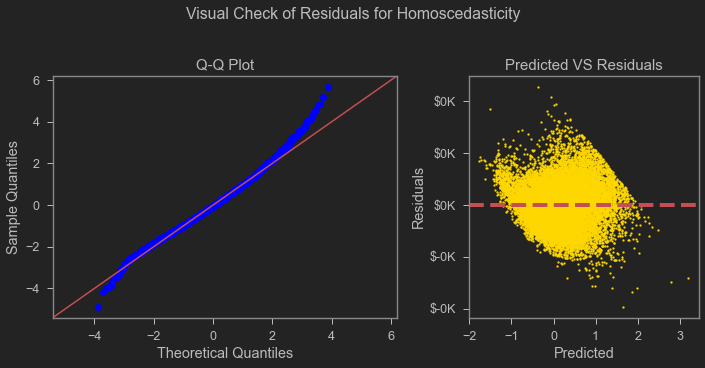

In [131]:
OLS_sm(df=df_model_2,
       numeric_features=numeric_feat,
       categorical_features=categorical_feat_,show_plots=True,show_summary=True)

>> throwaway model

Formula for the OLS model:  price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + sqft_basement + yr_built + sqft_living15 + sqft_lot15 + distance_from_downtown_mile + total_sqft_larger_than_neighbours + is_renovated + price_per_sqft + C(waterfront) + C(condition) + C(grade)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     2244.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:42:59   Log-Likelihood:                -7411.0
No. Observations:               19975   AIC:                         1.488e+04
Df Residuals:                   19947   BIC:                         1.510e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             0.2214      0.358      0.619      0.536      -0.480       0.923
C(waterfront)[T.1.0]                  0.7311      0.050     14.650      0.000       0.633       0.829
C(condition)[T.-1.0]                  0.1174      0.073      1.602      0.109      -0.026       0.261
C(condition)[T.0.0]                   0.2105      0.068      3.086      0.002       0.077       0.344
C(condition)[T.1.0]                   0.3092      0.068      4.531      0.000       0.175       0.443
C(condition)[T.2.0]                   0.3712      0.069      5.406      0.000       0.237       0.506
C(grade)[T.-3.0]                     -0.5157      0.358     -1.442      0.149      -1.217       0.185
C(grade)[T.-2.0]                     -0.6174      0.352     -1.754      0.079      -1.307       0.073
C(grade)[T.-1.0]                     -0.5734      0.351     -1.632      0.103      -1.262       0.115
C(grade)[T.0.0]                      -0.4281      0.351     -1.218      0.223      -1.117       0.261
C(grade)[T.1.0]                      -0.2813      0.351     -0.800      0.424      -0.970       0.408
C(grade)[T.2.0]                      -0.0577      0.352     -0.164      0.870      -0.747       0.632
C(grade)[T.3.0]                       0.0972      0.352      0.276      0.782      -0.593       0.787
C(grade)[T.4.0]                       0.1277      0.354      0.361      0.718      -0.566       0.821
C(grade)[T.5.0]                      -0.3036      0.406     -0.747      0.455      -1.100       0.493
bedrooms                             -0.0067      0.004     -1.774      0.076      -0.014       0.001
bathrooms                             0.0315      0.006      5.072      0.000       0.019       0.044
sqft_living                           0.4568      0.008     56.824      0.000       0.441       0.473
sqft_lot                              0.0082      0.000     17.693      0.000       0.007       0.009
floors                               -0.2504      0.008    -32.823      0.000      -0.265      -0.235
sqft_basement                        -0.1200      0.004    -27.384      0.000      -0.129      -0.111
yr_built                             -0.1682      0.006    -27.517      0.000      -0.180      -0.156
sqft_living15                         0.2187      0.005     41.236      0.000       0.208       0.229
sqft_lot15                            0.0088      0.001     13.395      0.000       0.007       0.010
distance_from_downtown_mile          -0.2294      0.005    -43.062      0.000      -0.240      -0.219
total_sqft_larger_than_neighbours    -0.1927      0.019    -10.110      0.000      -0.230      -0.155
is_renovated                          0.1103      0.015      7.179      0.000       0.080       0.140
price_per_sqft         

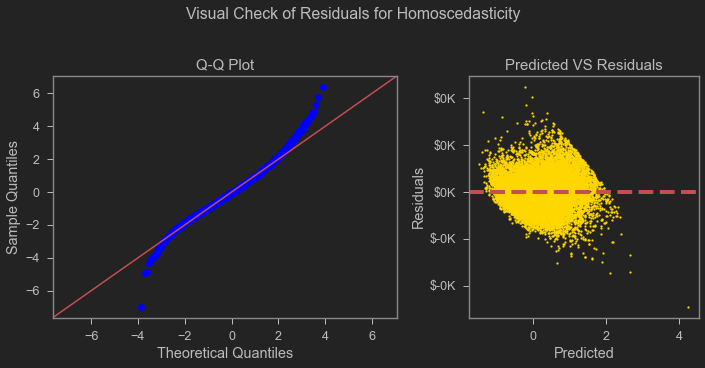

In [132]:
OLS_sm(df=df_model_2,
       numeric_features=numeric_feat+['price_per_sqft'],
       categorical_features=categorical_feat_,show_plots=True,show_summary=True)

`price_per_sqft` is leaking information, thus dropping it for now.

In [133]:
df_model_2 = without_ppsq.copy()

In [134]:
df_model_2

price  bedrooms  ...  total_sqft_larger_than_neighbours  is_renovated
0     -0.761071       0.0  ...                                0.0           0.0
1      0.367857       0.0  ...                                0.0           1.0
2     -0.910714      -1.0  ...                                0.0           0.0
3      0.603571       1.0  ...                                0.0           0.0
4      0.267857       0.0  ...                                0.0           0.0
...         ...       ...  ...                                ...           ...
19970 -0.267857       0.0  ...                                0.0           0.0
19971 -0.125000       1.0  ...                                0.0           0.0
19972 -0.117496      -1.0  ...                                0.0           0.0
19973 -0.125000       0.0  ...                                0.0           0.0
19974 -0.392857      -1.0  ...                                0.0           0.0

[19975 rows x 16 columns]

In [135]:
correlation_top_bottom(df_model_2.corr())

Positive correlations:
   index                  feature_combo  correlation
0     59  sqft_living15 and sqft_living     0.731599
1     35      bathrooms and sqft_living     0.711160
2     76        sqft_lot and sqft_lot15     0.704609
3     56          grade and sqft_living     0.694137
4    139        sqft_living15 and grade     0.662505
5      8                price and grade     0.618400
6     40            bathrooms and grade     0.605563
7     19       sqft_living and bedrooms     0.604535
8      3          price and sqft_living     0.604388
9     42         bathrooms and yr_built     0.549182

----------------------------------------------------------------------
Negative correlations:
   index                                  feature_combo  correlation
0    122                         condition and yr_built    -0.355174
1     13          price and distance_from_downtown_mile    -0.304061
2     89                       floors and sqft_basement    -0.296901
3     87               

# Feature Selection

## Exploratory Simple  OLS a.k.a. Univariate OLS or ANNOVA 

>> On all data

Dependent variable is price. A list containing all of the features were regressed. That list is:


In [136]:
df_model.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'distance_from_downtown_mile', 'price_per_sqft',
       'total_sqft_larger_than_neighbours', 'is_renovated'],
      dtype='object')

In [137]:
# Data from calucation for checking normality assumption code
df_stat = pd.DataFrame(stat_list).set_index('name')
df_stat.sort_values(by='r_sq',ascending=False).style.set_precision(4).set_properties(**{'color': 'lawngreen'})

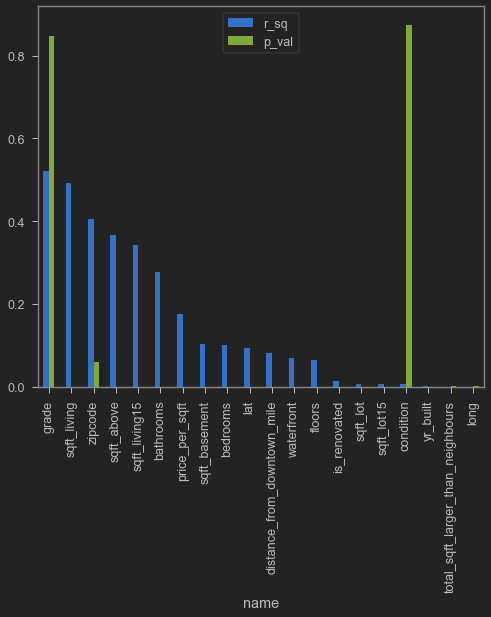

In [138]:
for_plot_df=df_stat.sort_values(by='r_sq',ascending=False)[1:]
ax = for_plot_df[['r_sq','p_val']].plot(kind='bar',rot=90)
ax.set_xticks(np.arange(len(for_plot_df)))
ax.set_autoscalex_on(False)

## Exploratory Multiple OLS a.k.a Multivariate OLS

Formula for the OLS model:  price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + sqft_basement + yr_built + sqft_living15 + sqft_lot15 + distance_from_downtown_mile + C(waterfront) + C(condition) + C(grade) + C(is_renovated) + C(total_sqft_larger_than_neighbours)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     1586.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:43:00   Log-Likelihood:                -10157.
No. Observations:               19975   AIC:                         2.037e+04
Df Residuals:                   19948   BIC:                         2.058e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                       0.1046      0.411      0.255      0.799      -0.700       0.910
C(waterfront)[T.1.0]                            0.6684      0.057     11.675      0.000       0.556       0.781
C(condition)[T.-1.0]                            0.1642      0.084      1.953      0.051      -0.001       0.329
C(condition)[T.0.0]                             0.3398      0.078      4.343      0.000       0.186       0.493
C(condition)[T.1.0]                             0.4356      0.078      5.566      0.000       0.282       0.589
C(condition)[T.2.0]                             0.5431      0.079      6.897      0.000       0.389       0.697
C(grade)[T.-3.0]                               -0.7826      0.410     -1.907      0.057      -1.587       0.022
C(grade)[T.-2.0]                               -0.8246      0.404     -2.042      0.041      -1.616      -0.033
C(grade)[T.-1.0]                               -0.7569      0.403     -1.878      0.060      -1.547       0.033
C(grade)[T.0.0]                                -0.5029      0.403     -1.247      0.212      -1.293       0.287
C(grade)[T.1.0]                                -0.2618      0.403     -0.649      0.516      -1.052       0.529
C(grade)[T.2.0]                                 0.0277      0.403      0.069      0.945      -0.763       0.818
C(grade)[T.3.0]                                 0.1828      0.404      0.453      0.651      -0.609       0.974
C(grade)[T.4.0]                                 0.2434      0.406      0.600      0.549      -0.552       1.039
C(grade)[T.5.0]                                -0.1855      0.466     -0.398      0.691      -1.099       0.729
C(is_renovated)[T.1.0]                          0.1314      0.018      7.457      0.000       0.097       0.166
C(total_sqft_larger_than_neighbours)[T.1.0]    -0.0291      0.022     -1.339      0.180      -0.072       0.013
bedrooms                                       -0.0413      0.004     -9.595      0.000      -0.050      -0.033
bathrooms                                       0.0766      0.007     10.814      0.000       0.063       0.091
sqft_living                                     0.3082      0.009     34.357      0.000       0.291       0.326
sqft_lot                                        0.0065      0.001     12.144      0.000       0.005       0.008
floors                                          0.0229      0.008      2.935      0.003       0.008       0.038
sqft_basement                                  -0.0509      0.005    -10.331      0.000      -0.061      -0.041
yr_built                                       -0.1656      0.007    -23.608      0.000      -0.179      -0.152
sqft_living15                                   0.1983     

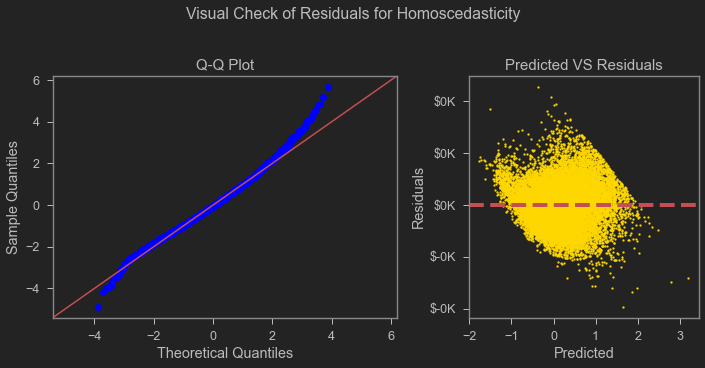

In [139]:
OLS_sm(df=df_model_2,
       numeric_features=[
           'bedrooms',
           'bathrooms',
           'sqft_living',
           'sqft_lot',
           'floors',
           'sqft_basement',
           'yr_built',
           'sqft_living15',
           'sqft_lot15',
           'distance_from_downtown_mile',
       ],
       dependant_var='price',
       categorical_features=[
           'waterfront', 'condition', 'grade', 'is_renovated',
           'total_sqft_larger_than_neighbours'
       ],
       verbose=False)

## One Hot Encoding

In [140]:
categorical_features=[
           'waterfront', 'condition', 'grade', 'is_renovated',
           'total_sqft_larger_than_neighbours']

In [141]:
df_model_processed_ohe = pd.get_dummies(df_model_2,
                                        columns=[
                                            'waterfront', 'condition', 'grade',
                                            'is_renovated',
                                            'total_sqft_larger_than_neighbours'
                                        ],
                                        sparse=False,
                                        drop_first=True)
df_model_processed_ohe

price  ...  total_sqft_larger_than_neighbours_1.0
0     -0.761071  ...                                      0
1      0.367857  ...                                      0
2     -0.910714  ...                                      0
3      0.603571  ...                                      0
4      0.267857  ...                                      0
...         ...  ...                                    ...
19970 -0.267857  ...                                      0
19971 -0.125000  ...                                      0
19972 -0.117496  ...                                      0
19973 -0.125000  ...                                      0
19974 -0.392857  ...                                      0

[19975 rows x 27 columns]

## Feature selection

### Filter methods

Already applied filtering by correlation.

### Wrapper  methods

#### Forward Selection using Statsmodels

Using this a guideline.

In [142]:
def forward_selected(data, response):
    """
    Source: https://planspace.org/20150423-forward_selection_with_statsmodels/
    __________________________________________________________________________
    
    Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response.
    response: string, name of response column in data.
    
    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        r_sq_scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            r_sq_scores_with_candidates.append((score, candidate))

        r_sq_scores_with_candidates.sort()
        best_new_score, best_candidate = r_sq_scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    
    # plotting
    # plot 1
    fig, (ax1,
          ax2) = plt.subplots(ncols=2,
                              figsize=(10, 5),
                              gridspec_kw={'width_ratios': [0.6, 0.4]})
    sm.qqplot(model.resid,
              dist=stats.norm,
              line='45',
              fit=True,
              ax=ax1)
    ax1.set_title('Q-Q Plot', fontdict={"size": 15})
    # plot 2

    ax2.scatter(x=model.fittedvalues,
                y=model.resid,
                s=4,
                color='gold')
    ax2.set(xlabel='Predicted', ylabel='Reseduals')
    ax2.axhline(y=0, c='r', lw=4, ls='--')
    ax2.set_title('Predicted VS Reseduals', fontdict={"size": 15})
    plt.suptitle('Visual Check of Reseduals for Homoscedasticity',
                 ha='center',
                 va='bottom',
                 fontdict={"size": 25})
    plt.tight_layout()
    return model

In [143]:
def catch_forward_selected_steps(data, response):
    """
    Optimal feature selection helper formula.
    
    modified from
    Source: https://planspace.org/20150423-forward_selection_with_statsmodels/
    __________________________________________________________________________
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    li = []
    n =0
    while remaining and current_score == best_new_score:
        r_sq_scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            r_sq_scores_with_candidates.append((score, candidate))
        r_sq_scores_with_candidates.sort()
        best_new_score, best_candidate = r_sq_scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
            n+=1
            tem_d = {'variable_count': n,'r_sq_adj':current_score}
            li.append(tem_d)
    return li

variable_count  r_sq_adj
0                1  0.382388
1                2  0.513981
2                3  0.609593
3                4  0.629989
4                5  0.647099
5                6  0.654238
6                7  0.659856
7                8  0.662736
8                9  0.665432
9               10  0.667641
10              11  0.669555
11              12  0.670572
12              13  0.670831
13              14  0.671049
14              15  0.671054

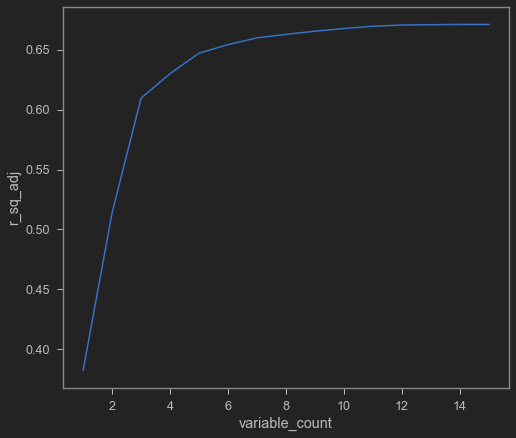

In [144]:
# Without OHE, this is wrong approach
catch = pd.DataFrame(catch_forward_selected_steps(df_model_2, 'price'))
sns.lineplot(x='variable_count',y='r_sq_adj',data=catch);
catch

variable_count  r_sq_adj
0                1  0.365253
1                2  0.544675
2                3  0.592259
3                4  0.601689
4                5  0.611253
5                6  0.630855
6                7  0.646900
7                8  0.654035
8                9  0.657412
9               10  0.660401
10              11  0.662921
11              12  0.665511
12              13  0.668086
13              14  0.670153
14              15  0.671848
15              16  0.672785
16              17  0.673084
17              18  0.673359
18              19  0.673478
19              20  0.673518
20              21  0.673531

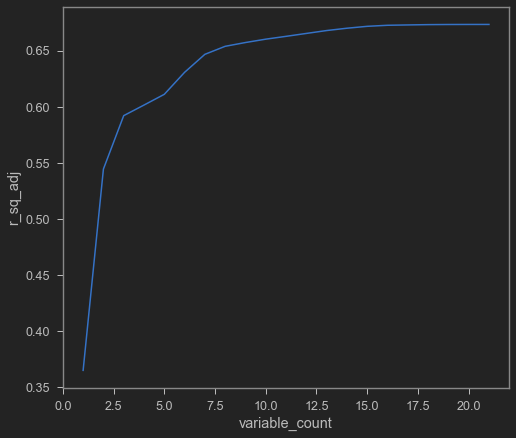

In [145]:
# with OHE
name_list = [x.split(".")[0].replace("-","") for x in list(df_model_processed_ohe.columns)]
df_model_processed_ohe.columns = name_list

catch_ = pd.DataFrame(catch_forward_selected_steps(df_model_processed_ohe, 'price'))
sns.lineplot(x='variable_count',y='r_sq_adj',data=catch_);
catch_

Optimal number of features where diminishing return starts to occur.

price ~ sqft_living + distance_from_downtown_mile + sqft_living15 + grade_2 + grade_1 + grade_0 + yr_built + sqft_lot + condition_2 + grade_3 + condition_1 + sqft_basement + waterfront_1 + bathrooms + bedrooms + is_renovated_1 + condition_0 + sqft_lot15 + floors + grade_4 + total_sqft_larger_than_neighbours_1 + 1
0.6735309838415255


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     1649.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:43:19   Log-Likelihood:                -10157.
No. Observations:               19975   AIC:                         2.037e+04
Df Residuals:                   19949   BIC:                         2.057e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.0342      0.217     -0.158      0.875      -0.459       0.390
sqft_living                             0.3080      0.009     34.371      0.000       0.290       0.326
distance_from_downtown_mile            -0.4362      0.005    -81.929      0.000      -0.447      -0.426
sqft_living15                           0.1983      0.006     32.636      0.000       0.186       0.210
grade_2[0]                             -0.6860      0.204     -3.362      0.001      -1.086      -0.286
grade_2[1]                              0.1666      0.202      0.826      0.409      -0.229       0.562
grade_1[0]                             -0.6182      0.202     -3.054      0.002      -1.015      -0.221
grade_1[1]                             -0.1229      0.202     -0.609      0.543      -0.519       0.273
grade_0                                -0.3642      0.202     -1.802      0.072      -0.760       0.032
yr_built                               -0.1657      0.007    -23.622      0.000      -0.179      -0.152
sqft_lot                                0.0065      0.001     12.144      0.000       0.005       0.008
condition_2                             0.5431      0.079      6.898      0.000       0.389       0.697
grade_3[0]                             -0.6440      0.217     -2.971      0.003      -1.069      -0.219
grade_3[1]                              0.3219      0.202      1.593      0.111      -0.074       0.718
condition_1[0]                          0.1642      0.084      1.953      0.051      -0.001       0.329
condition_1[1]                          0.4356      0.078      5.566      0.000       0.282       0.589
sqft_basement                          -0.0509      0.005    -10.325      0.000      -0.061      -0.041
waterfront_1                            0.6683      0.057     11.675      0.000       0.556       0.781
bathrooms                               0.0766      0.007     10.810      0.000       0.063       0.090
bedrooms                               -0.0413      0.004     -9.593      0.000      -0.050      -0.033
is_renovated_1                          0.1314      0.018      7.457      0.000       0.097       0.166
condition_0                             0.3397      0.078      4.343      0.000       0.186       0.493
sqft_lot15                              0.0033      0.001      4.392      0.000       0.002       0.005
floors                                  0.0230      0.008      2.941      0.003       0.008       0.038
grade_4                                 0.3825      0.206      1.860      0.063      -0.021       0.786
total_sqft_larger_than_neighbours_1    -0.0291      0.022     -1.341      0.180      -0.072       0.013
===================================================================

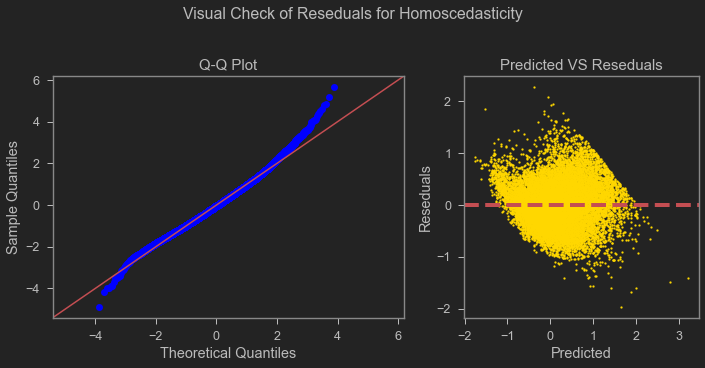

In [146]:
model = forward_selected(df_model_processed_ohe, 'price')
print(model.model.formula)
print(model.rsquared_adj)
model.summary()

price ~ sqft_living + distance_from_downtown_mile + sqft_living15 + grade_2 + grade_1 + grade_0 + yr_built + sqft_lot + condition_2 + grade_3 + condition_1 + sqft_basement + waterfront_1 + bathrooms + bedrooms + is_renovated_1 + condition_0 + sqft_lot15 + floors + grade_4 + total_sqft_larger_than_neighbours_1 + 1
0.6735309838415255


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     1649.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:43:21   Log-Likelihood:                -10157.
No. Observations:               19975   AIC:                         2.037e+04
Df Residuals:                   19949   BIC:                         2.057e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.0342      0.217     -0.158      0.875      -0.459       0.390
sqft_living                             0.3080      0.009     34.371      0.000       0.290       0.326
distance_from_downtown_mile            -0.4362      0.005    -81.929      0.000      -0.447      -0.426
sqft_living15                           0.1983      0.006     32.636      0.000       0.186       0.210
grade_2[0]                             -0.6860      0.204     -3.362      0.001      -1.086      -0.286
grade_2[1]                              0.1666      0.202      0.826      0.409      -0.229       0.562
grade_1[0]                             -0.6182      0.202     -3.054      0.002      -1.015      -0.221
grade_1[1]                             -0.1229      0.202     -0.609      0.543      -0.519       0.273
grade_0                                -0.3642      0.202     -1.802      0.072      -0.760       0.032
yr_built                               -0.1657      0.007    -23.622      0.000      -0.179      -0.152
sqft_lot                                0.0065      0.001     12.144      0.000       0.005       0.008
condition_2                             0.5431      0.079      6.898      0.000       0.389       0.697
grade_3[0]                             -0.6440      0.217     -2.971      0.003      -1.069      -0.219
grade_3[1]                              0.3219      0.202      1.593      0.111      -0.074       0.718
condition_1[0]                          0.1642      0.084      1.953      0.051      -0.001       0.329
condition_1[1]                          0.4356      0.078      5.566      0.000       0.282       0.589
sqft_basement                          -0.0509      0.005    -10.325      0.000      -0.061      -0.041
waterfront_1                            0.6683      0.057     11.675      0.000       0.556       0.781
bathrooms                               0.0766      0.007     10.810      0.000       0.063       0.090
bedrooms                               -0.0413      0.004     -9.593      0.000      -0.050      -0.033
is_renovated_1                          0.1314      0.018      7.457      0.000       0.097       0.166
condition_0                             0.3397      0.078      4.343      0.000       0.186       0.493
sqft_lot15                              0.0033      0.001      4.392      0.000       0.002       0.005
floors                                  0.0230      0.008      2.941      0.003       0.008       0.038
grade_4                                 0.3825      0.206      1.860      0.063      -0.021       0.786
total_sqft_larger_than_neighbours_1    -0.0291      0.022     -1.341      0.180      -0.072       0.013
===================================================================

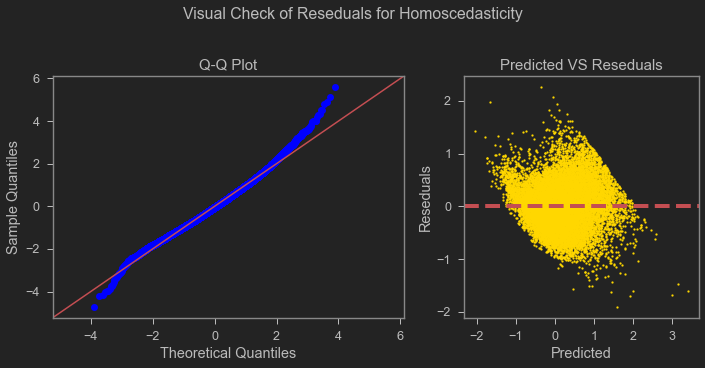

In [147]:
# without one hot encoding, wrong approach
model1 = forward_selected(df_model_2, 'price')
print(model.model.formula)
print(model.rsquared_adj)
model.summary()

price ~ sqft_living + distance_from_downtown_mile + sqft_living15 + grade_2 + grade_1 + grade_0 + yr_built + sqft_lot + condition_2 + grade_3 + condition_1 + sqft_basement + waterfront_1 + bathrooms + bedrooms + is_renovated_1 + condition_0 + sqft_lot15 + floors + grade_4 + total_sqft_larger_than_neighbours_1 + 1
0.6735309838415255


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     1649.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:43:29   Log-Likelihood:                -10157.
No. Observations:               19975   AIC:                         2.037e+04
Df Residuals:                   19949   BIC:                         2.057e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.0342      0.217     -0.158      0.875      -0.459       0.390
sqft_living                             0.3080      0.009     34.371      0.000       0.290       0.326
distance_from_downtown_mile            -0.4362      0.005    -81.929      0.000      -0.447      -0.426
sqft_living15                           0.1983      0.006     32.636      0.000       0.186       0.210
grade_2[0]                             -0.6860      0.204     -3.362      0.001      -1.086      -0.286
grade_2[1]                              0.1666      0.202      0.826      0.409      -0.229       0.562
grade_1[0]                             -0.6182      0.202     -3.054      0.002      -1.015      -0.221
grade_1[1]                             -0.1229      0.202     -0.609      0.543      -0.519       0.273
grade_0                                -0.3642      0.202     -1.802      0.072      -0.760       0.032
yr_built                               -0.1657      0.007    -23.622      0.000      -0.179      -0.152
sqft_lot                                0.0065      0.001     12.144      0.000       0.005       0.008
condition_2                             0.5431      0.079      6.898      0.000       0.389       0.697
grade_3[0]                             -0.6440      0.217     -2.971      0.003      -1.069      -0.219
grade_3[1]                              0.3219      0.202      1.593      0.111      -0.074       0.718
condition_1[0]                          0.1642      0.084      1.953      0.051      -0.001       0.329
condition_1[1]                          0.4356      0.078      5.566      0.000       0.282       0.589
sqft_basement                          -0.0509      0.005    -10.325      0.000      -0.061      -0.041
waterfront_1                            0.6683      0.057     11.675      0.000       0.556       0.781
bathrooms                               0.0766      0.007     10.810      0.000       0.063       0.090
bedrooms                               -0.0413      0.004     -9.593      0.000      -0.050      -0.033
is_renovated_1                          0.1314      0.018      7.457      0.000       0.097       0.166
condition_0                             0.3397      0.078      4.343      0.000       0.186       0.493
sqft_lot15                              0.0033      0.001      4.392      0.000       0.002       0.005
floors                                  0.0230      0.008      2.941      0.003       0.008       0.038
grade_4                                 0.3825      0.206      1.860      0.063      -0.021       0.786
total_sqft_larger_than_neighbours_1    -0.0291      0.022     -1.341      0.180      -0.072       0.013
===================================================================

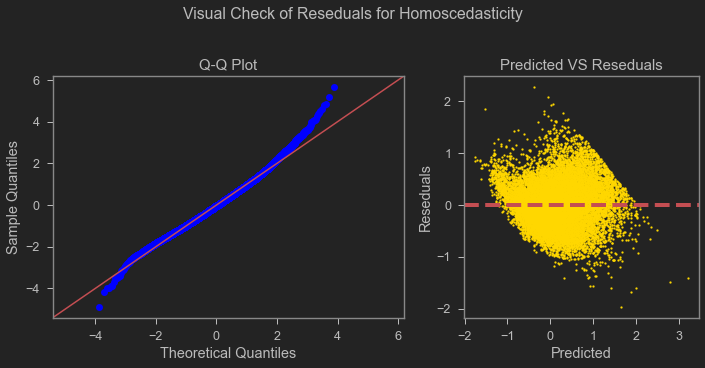

In [148]:
# with one hot encoding, wrong approach
model1 = forward_selected(df_model_processed_ohe, 'price')
print(model.model.formula)
print(model.rsquared_adj)
model.summary()

### Hybrid feature Elimination

#### Recursive Feature Elimination Scikit-learn

In [149]:
from sklearn.feature_selection import RFE

In [150]:
X = df_model_processed_ohe.drop(columns='price').copy()

In [151]:
y = df_model_processed_ohe['price'].copy()

In [152]:
linreg = LinearRegression(n_jobs=8)
selector = RFE(linreg ,n_features_to_select=6) 
selector = selector.fit(X, y.values.ravel())

In [153]:
selector.support_

array([False, False,  True, False, False, False, False, False, False,
        True,  True, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False])

In [154]:
selector.ranking_ #The feature ranking

array([17, 14,  1, 20, 18, 15, 12,  7, 21,  1,  1, 11, 10,  9,  6,  1,  1,
        1,  2,  3, 16,  8,  4, 13,  5, 19])

In [155]:
features_selection = pd.DataFrame(list(
    zip(X.columns.to_list(), selector.support_.tolist(),
        selector.ranking_.tolist())),
                                   columns=['Feature', 'keep', 'ranking'])
features_selection.sort_values(by="ranking", ascending=True)

Feature   keep  ranking
10                         waterfront_1   True        1
2                           sqft_living   True        1
17                              grade_1   True        1
16                              grade_2   True        1
15                              grade_3   True        1
9           distance_from_downtown_mile   True        1
18                              grade_0  False        2
19                              grade_1  False        3
22                              grade_4  False        4
24                       is_renovated_1  False        5
14                          condition_2  False        6
7                         sqft_living15  False        7
21                              grade_3  False        8
13                          condition_1  False        9
12                          condition_0  False       10
11                          condition_1  False       11
6                              yr_built  False       12
23                              grade_5  False       13
1                             bathrooms  False       14
5                         sqft_basement  False       15
20                              grade_2  False       16
0                              bedrooms  False       17
4                                floors  False       18
25  total_sqft_larger_than_neighbours_1  False       19
3                              sqft_lot  False       20
8                            sqft_lot15  False       21

In [156]:
features_selection.Feature.to_list()

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_basement',
 'yr_built',
 'sqft_living15',
 'sqft_lot15',
 'distance_from_downtown_mile',
 'waterfront_1',
 'condition_1',
 'condition_0',
 'condition_1',
 'condition_2',
 'grade_3',
 'grade_2',
 'grade_1',
 'grade_0',
 'grade_1',
 'grade_2',
 'grade_3',
 'grade_4',
 'grade_5',
 'is_renovated_1',
 'total_sqft_larger_than_neighbours_1']

Formula for the OLS model:  price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + sqft_basement + yr_built + sqft_living15 + sqft_lot15 + distance_from_downtown_mile + waterfront_1 + condition_1 + condition_0 + condition_1 + condition_2 + grade_3 + grade_2 + grade_1 + grade_0 + grade_1 + grade_2 + grade_3 + grade_4 + grade_5 + is_renovated_1 + total_sqft_larger_than_neighbours_1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     1586.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:43:30   Log-Likelihood:                -10157.
No. Observations:               19975   AIC:                         2.037e+04
Df Residuals:                   19948   BIC:                         2.058e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.1046      0.411      0.255      0.799      -0.700       0.910
bedrooms                               -0.0413      0.004     -9.595      0.000      -0.050      -0.033
bathrooms                               0.0766      0.007     10.814      0.000       0.063       0.091
sqft_living                             0.3082      0.009     34.357      0.000       0.291       0.326
sqft_lot                                0.0065      0.001     12.144      0.000       0.005       0.008
floors                                  0.0229      0.008      2.935      0.003       0.008       0.038
sqft_basement                          -0.0509      0.005    -10.331      0.000      -0.061      -0.041
yr_built                               -0.1656      0.007    -23.608      0.000      -0.179      -0.152
sqft_living15                           0.1983      0.006     32.638      0.000       0.186       0.210
sqft_lot15                              0.0033      0.001      4.393      0.000       0.002       0.005
distance_from_downtown_mile            -0.4363      0.005    -81.870      0.000      -0.447      -0.426
waterfront_1                            0.6684      0.057     11.675      0.000       0.556       0.781
condition_1[0]                          0.1642      0.084      1.953      0.051      -0.001       0.329
condition_1[1]                          0.4356      0.078      5.566      0.000       0.282       0.589
condition_0                             0.3398      0.078      4.343      0.000       0.186       0.493
condition_2                             0.5431      0.079      6.897      0.000       0.389       0.697
grade_3[0]                             -0.7826      0.410     -1.907      0.057      -1.587       0.022
grade_3[1]                              0.1828      0.404      0.453      0.651      -0.609       0.974
grade_2[0]                             -0.8246      0.404     -2.042      0.041      -1.616      -0.033
grade_2[1]                              0.0277      0.403      0.069      0.945      -0.763       0.818
grade_1[0]                             -0.7569      0.403     -1.878      0.060      -1.547       0.033
grade_1[1]                             -0.2618      0.403     -0.649      0.516      -1.052       0.529
grade_0                                -0.5029      0.403     -1.247      0.212      -1.293       0.287
grade_4                                 0.2434      0.406      0.600      0.549      -0.552       1.039
grade_5                                -0.1855      0.466     -0.398      0.691      -1.099       0.729
is_renovated_1                          0.1314      0.018      7.457      0.000       0.097       0.166
total_sqft_larger_than_neighbours_1    -0.0291      0.022     -1.33

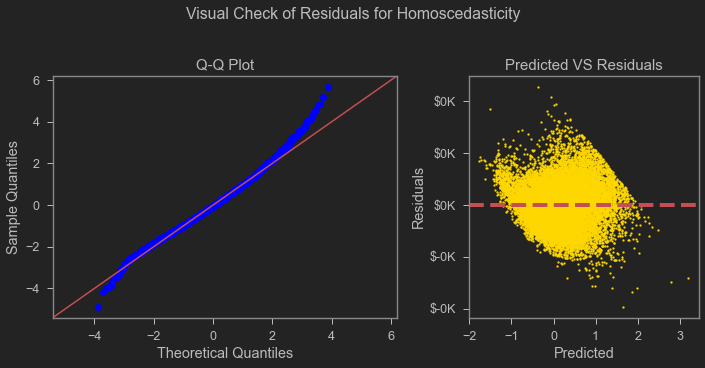

In [157]:
fin1 = OLS_sm(df=df_model_processed_ohe,numeric_features=features_selection.Feature.to_list())

In [158]:
check_for_high_p_val(fin1)

In [159]:
fin1 = OLS_sm(df=df_model_processed_ohe,numeric_features=['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_basement',
 'yr_built',
 'sqft_living15',
 'sqft_lot15',
 'distance_from_downtown_mile',
 'waterfront_1',
 'condition_1',
 'condition_0',
 'condition_1',
 'condition_2',
 'is_renovated_1'])

Formula for the OLS model:  price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + sqft_basement + yr_built + sqft_living15 + sqft_lot15 + distance_from_downtown_mile + waterfront_1 + condition_1 + condition_0 + condition_1 + condition_2 + is_renovated_1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     2139.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:43:30   Log-Likelihood:                -11376.
No. Observations:               19975   AIC:                         2.279e+04
Df Residuals:                   19958   BIC:                         2.292e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.4312      0.083     -5.206      0.000      -0.593      -0.269
bedrooms                       -0.0694      0.004    -15.529      0.000      -0.078      -0.061
bathrooms                       0.0989      0.007     13.242      0.000       0.084       0.114
sqft_living                     0.4608      0.009     52.588      0.000       0.444       0.478
sqft_lot                        0.0072      0.001     12.700      0.000       0.006       0.008
floors                          0.0545      0.008      6.647      0.000       0.038       0.071
sqft_basement                  -0.0829      0.005    -16.249      0.000      -0.093      -0.073
yr_built                       -0.0789      0.007    -11.022      0.000      -0.093      -0.065
sqft_living15                   0.2860      0.006     46.480      0.000       0.274       0.298
sqft_lot15                      0.0028      0.001      3.579      0.000       0.001       0.004
distance_from_downtown_mile    -0.4969      0.005    -90.355      0.000      -0.508      -0.486
waterfront_1                    0.6493      0.061     10.678      0.000       0.530       0.769
condition_1[0]                  0.2611      0.089      2.930      0.003       0.086       0.436
condition_1[1]                  0.5939      0.083      7.179      0.000       0.432       0.756
condition_0                     0.4919      0.083      5.946      0.000       0.330       0.654
condition_2                     0.6945      0.083      8.342      0.000       0.531       0.858
is_renovated_1                  0.1663      0.019      8.900      0.000       0.130       0.203
==============================================================================
Omnibus:                      329.044   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              375.422
Skew:                           0.271   Prob(JB):                     3.01e-82
Kurtosis:                       3.396   Cond. No.                         548.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
check_for_high_p_val(fin1)

Best by RFE but, can not take partial condition.

NOTE: Adding back other features like "zipcode" and "view" can have a huge impact. Then again not venturing that rout at this time.

# MODEL

## Some experiments

In [161]:
RFE_recom = ['waterfront','grade','sqft_living','distance_from_downtown_mile','is_renovated','sqft_living15','condition','yr_built']

In [162]:
Forward_selection = ['sqft_living','distance_from_downtown_mile','sqft_living15','grade','yr_built','sqft_lot','condition' ]

Creating a list based on the recommendations of RFE and Forward selection. Does RFE works well on categorial data liner regression? I am using these as tool for prediction rather than building a unattended pipeline. Useing them as a guide.

In [163]:
set(RFE_recom + Forward_selection)

{'condition',
 'distance_from_downtown_mile',
 'grade',
 'is_renovated',
 'sqft_living',
 'sqft_living15',
 'sqft_lot',
 'waterfront',
 'yr_built'}

Formula for the OLS model:  price ~ distance_from_downtown_mile + sqft_living + sqft_living15 + sqft_lot + yr_built + C(condition) + C(grade) + C(is_renovated) + C(waterfront)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     2004.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:43:31   Log-Likelihood:                -10350.
No. Observations:               19975   AIC:                         2.074e+04
Df Residuals:                   19954   BIC:                         2.091e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.1125      0.415      0.271      0.786      -0.700       0.925
C(condition)[T.-1.0]            0.1525      0.085      1.797      0.072      -0.014       0.319
C(condition)[T.0.0]             0.3326      0.079      4.211      0.000       0.178       0.487
C(condition)[T.1.0]             0.4141      0.079      5.242      0.000       0.259       0.569
C(condition)[T.2.0]             0.5322      0.079      6.697      0.000       0.376       0.688
C(grade)[T.-3.0]               -0.8018      0.414     -1.936      0.053      -1.614       0.010
C(grade)[T.-2.0]               -0.8507      0.408     -2.087      0.037      -1.650      -0.052
C(grade)[T.-1.0]               -0.7930      0.407     -1.949      0.051      -1.591       0.005
C(grade)[T.0.0]                -0.5379      0.407     -1.322      0.186      -1.336       0.260
C(grade)[T.1.0]                -0.2682      0.407     -0.659      0.510      -1.066       0.530
C(grade)[T.2.0]                 0.0488      0.407      0.120      0.905      -0.749       0.847
C(grade)[T.3.0]                 0.2305      0.408      0.566      0.572      -0.568       1.029
C(grade)[T.4.0]                 0.3259      0.410      0.796      0.426      -0.477       1.129
C(grade)[T.5.0]                -0.0199      0.471     -0.042      0.966      -0.942       0.903
C(is_renovated)[T.1.0]          0.1697      0.018      9.635      0.000       0.135       0.204
C(waterfront)[T.1.0]            0.6866      0.058     11.894      0.000       0.573       0.800
distance_from_downtown_mile    -0.4318      0.005    -85.822      0.000      -0.442      -0.422
sqft_living                     0.2757      0.006     43.682      0.000       0.263       0.288
sqft_living15                   0.2029      0.006     33.740      0.000       0.191       0.215
sqft_lot                        0.0082      0.000     20.693      0.000       0.007       0.009
yr_built                       -0.1181      0.006    -18.948      0.000      -0.130      -0.106
==============================================================================
Omnibus:                      453.091   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              554.352
Skew:                           0.307   Prob(JB):                    4.21e-121
Kurtosis:                       3.537   Cond. No.                     3.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

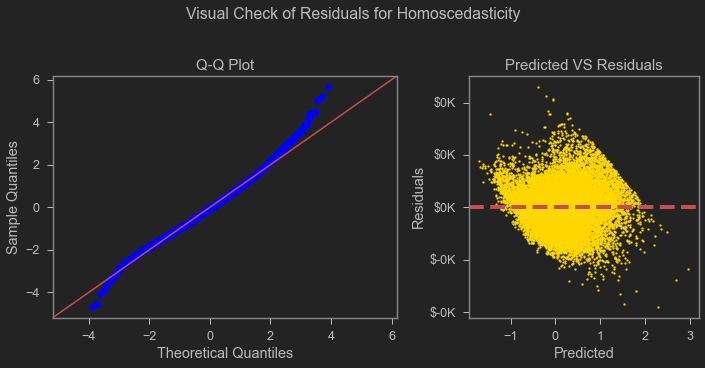

In [164]:
fin = OLS_sm(
    df=df_model_2,
    numeric_features=[
        'distance_from_downtown_mile', 'sqft_living', 'sqft_living15',
        'sqft_lot', 'yr_built'
    ],
    categorical_features=['condition', 'grade', 'is_renovated', 'waterfront'])

In [165]:
check_for_high_p_val(fin)

Dropping these for next iteration of model.

Formula for the OLS model:  price ~ distance_from_downtown_mile + sqft_living + sqft_living15 + sqft_lot + yr_built + C(is_renovated) + C(waterfront)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     4402.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:43:32   Log-Likelihood:                -12026.
No. Observations:               19975   AIC:                         2.407e+04
Df Residuals:                   19967   BIC:                         2.413e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.0707      0.003     21.108      0.000       0.064       0.077
C(is_renovated)[T.1.0]          0.1874      0.019      9.955      0.000       0.151       0.224
C(waterfront)[T.1.0]            0.6796      0.063     10.837      0.000       0.557       0.803
distance_from_downtown_mile    -0.4936      0.005    -94.335      0.000      -0.504      -0.483
sqft_living                     0.4214      0.006     66.902      0.000       0.409       0.434
sqft_living15                   0.3049      0.006     49.709      0.000       0.293       0.317
sqft_lot                        0.0087      0.000     20.406      0.000       0.008       0.010
yr_built                       -0.0239      0.006     -4.248      0.000      -0.035      -0.013
==============================================================================
Omnibus:                      271.281   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.272
Skew:                           0.245   Prob(JB):                     5.14e-67
Kurtosis:                       3.357   Cond. No.                         156.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

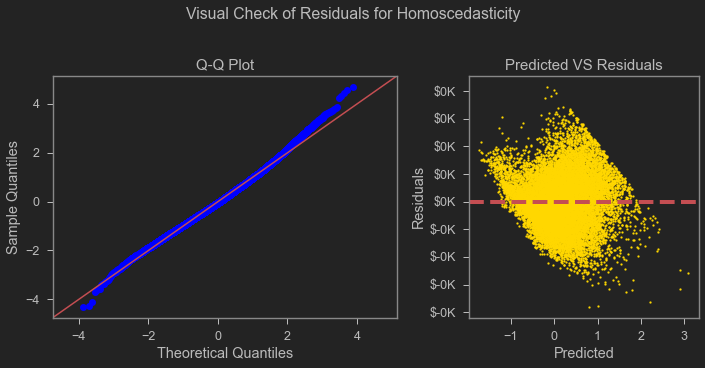

In [166]:
fin = OLS_sm(
    df=df_model_2,
    numeric_features=[
        'distance_from_downtown_mile', 'sqft_living', 'sqft_living15',
        'sqft_lot', 'yr_built'
    ],
    categorical_features=[ 'is_renovated', 'waterfront'])

In [167]:
check_for_high_p_val(fin)

I can go on doing this. But This is my final model. As there is no other significant p values left. And swapping features not going to help beyond this, as I already hit the diminishing return point. 

Being said that I am throwing condition in the mix. removed waterfront as there is less control over that and removed yr_built as a result of high p_val. Most importantly it is recommended by RFE.

In [168]:
final = OLS_sm(
    df=df_for_last_step,
    numeric_features=[
        'distance_from_downtown_mile', 'sqft_living', 'sqft_living15',
        'sqft_lot'
    ],
    categorical_features=[ 'is_renovated', 'condition'])
check_for_high_p_val(fin)

Formula for the OLS model:  price ~ distance_from_downtown_mile + sqft_living + sqft_living15 + sqft_lot + C(is_renovated) + C(condition)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     3491.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:43:32   Log-Likelihood:            -2.6245e+05
No. Observations:               19975   AIC:                         5.249e+05
Df Residuals:                   19965   BIC:                         5.250e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    3.189e+05   2.37e+04     13.453      0.000    2.72e+05    3.65e+05
C(is_renovated)[T.1.0]       6.502e+04   5141.670     12.645      0.000    5.49e+04    7.51e+04
C(condition)[T.-1.0]         5.943e+04   2.56e+04      2.321      0.020    9235.266     1.1e+05
C(condition)[T.0.0]          1.282e+05   2.37e+04      5.402      0.000    8.17e+04    1.75e+05
C(condition)[T.1.0]          1.477e+05   2.38e+04      6.215      0.000    1.01e+05    1.94e+05
C(condition)[T.2.0]          1.794e+05   2.39e+04      7.501      0.000    1.33e+05    2.26e+05
distance_from_downtown_mile -1.394e+05   1360.809   -102.423      0.000   -1.42e+05   -1.37e+05
sqft_living                  1.151e+05   1735.771     66.301      0.000    1.12e+05    1.18e+05
sqft_living15                8.773e+04   1705.428     51.444      0.000    8.44e+04    9.11e+04
sqft_lot                     2527.8924    118.879     21.264      0.000    2294.880    2760.905
==============================================================================
Omnibus:                      356.337   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              405.760
Skew:                           0.286   Prob(JB):                     7.77e-89
Kurtosis:                       3.400   Cond. No.                         474.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

I can see a little improvement here. So this is the model I am gonna go forward with. One category of condition had a good impact on r square. Also swapped model to a one containing unscaled price. Which will help me interpret coefficients better. 

In [169]:
round(pd.DataFrame(final.params).sort_values(by=0,ascending=False),2)

0
Intercept                    318876.68
C(condition)[T.2.0]          179403.32
C(condition)[T.1.0]          147676.79
C(condition)[T.0.0]          128191.14
sqft_living                  115084.21
sqft_living15                 87733.31
C(is_renovated)[T.1.0]        65018.78
C(condition)[T.-1.0]          59428.20
sqft_lot                       2527.89
distance_from_downtown_mile -139378.32

# iNTERPRET

Accuracy of this model is around 61% indicated by r square. None of them have significant p value. No collinearity detected. 
Now looking at the betas I can see the relationships: 
___
| Feature                              | Intercept (beta_1) | Comment                                                                                           | can control? |
|--------------------------------------|--------------------|---------------------------------------------------------------------------------------------------|--------------|
| Intercept                            | 330578.76          | Necessary to facilitate regression. OLS line goes through this on the y-axis                      |              |
| C(condition)[T.2.468888440743516]    | 179403.32          | Positive relation, can expect to see this much improvement of value for every additional point    | yes          |
| C(condition)[T.0.9195310230918753]   | 147676.79          | Positive relation, can expect to see this much improvement of value for every additional point    | yes          |
| C(condition)[T.-0.6298263945597655]  | 128191.14          | Positive relation, can expect to see this much improvement of value for every additional point    | yes          |
| sqft_living                          | 85367.37           | Positive relation, can expect to see this much improvement of value for every additional sqft     | yes          |
| sqft_living15                        | 66830.29           | Positive relation, can expect to see this much improvement of value for every additional point    | indirectly   |
| C(is_renovated)[T.5.692364186649059] | 65018.78           | Positive relation, can expect to see this much improvement of value if renovated                  | yes          |
| C(condition)[T.-2.1791838122114062]  | 59428.20           | Positive relation, can expect to see this much improvement of value for every additional point    | yes          |
| sqft_lot                             | 19286.77           | Positive relation, can expect to see this much improvement of value for every additional sqft     | yes          |
| distance_from_downtown_mile          | -94392.33          | Negative relation, can expect to see this much improvement of value for every additional distance | no           |




___



Q-Q plot of residuals looks good, but the scatter plot is messy, indicating some bias. This is because of the nature of the data.
<br>
<br>
Harsh outlier removal has impact on the result.

This is better from the base model, with every thing except r square. But the base model failed in everything except that, did not even satisfy some assumptions.

Adding more feature has a direct relation with r square. And leaving more outliers has a impact on the residuals distribution. One of the core assumptions of liner regression. Liner regression for this type of data alright, it tries to predict a specific price. In real life for this type of property use of range rather than accuracy is more appropriate. There are a lot of models out there for prediction. I dont know all of them. For that range calculation maybe a tree based model is better. I have little exposure to that right now. Liner regression is a widely use technique for prediction of price. Depending on target the r square varies.

# RECOMMENDATIONS & CONCLUSIONS

Homeowners should focus to:
<br>
* Condition of the house is important. Invest on improving elements that improves that. Focus on higher quality building materials.
* Try to increase sqft living; consider adding to the property.
* Should expect more value if closer to the city
* Grade provided by the city is important. Read the guidelines and do things that improve grade. Like better materials
* Dont be a outlier in the neighborhood in terms of living space. At least remodel to match that.
* lot size also matters. try to strike a perfect balance here.
* Bedrooms after 5 has a diminishing return. Do not focus on increasing. Instead invest on creating a better condition.
* Basement sqft has a negative relation with value. Focus else where.
* Renovation has a positive impact on price.
* Old houses sells for less. If house is old then try to get better grade and condition for better value.


Then they can observe a substantial improvement of their house value.

# Appendix

## Next Steps 
<br>
If I had the gift of time.

I would like to, in no particular order:

- data collecting
 - try a model with unscaled dependent variable; price and see the impact on model performance. That will help me better explain the data. But if not reporting those the the sign alone is enough. 
 * engineered more features. e.g. total house sqft, bedroom to bathroom ratio.
 * process date as year, or split it to year and month and try to capture seasonality of value on listing timing.
 * bin some features. e.g. year built by decades or something; bedrooms in single, typical, and large.
 * make some boolean features. e.g. has basement.
 * get some other monetary (e.g. average property price), and cultural and recreational (e.g. proximity to some stadium, local restaurant density, public transport, schools, parks) info about the locations. I am not sure how to get all those info.
 * get some more info about view and include in the analysis. LOCATION does matter in the real estate business.

- Modeling
 * try another method for RFE. e.g. tree based - random forest. RFECV - Recursive Feature Elimination with Cross Validation, RFE Hyperparameters tuning (really dont know much about this much at this time).
 * use cross validation a.k.a. rotation estimation. e.g. k-fold cross-validation, Repeated random sub-sampling validation a.k.a. Monte Carlo Simulation.
 * make train-test split and compare predictive power.
 * use some other metric other than r square. e.g. RMSE, p value, coefficients.
 * try other features in in model. go for an exhaustive search. 

- Functional
 * work on visuals, although wasted a lot of time doing this, mapping and what not.
 * ""functionize" EVERYTHING." - James M. Irving. On the same note - refine docstrings.
 * change naming convention of variables a bit

<br>
And the list goes on, I am stopping now. Almost nothing is perfect. The question is, is it good enough?